# Lending_Club - Data_Exploration

# Main Tasks
1. Read in the data
2. Exploratory Data Analysis (EDA)
    - 2.1 User related features (basic information)
    - 2.2 User related feature (financial specific - income)
    - 2.3 User feature (financial specific - credit scores)
    - 2.4 User feature (financial specific - credit lines)

In [1]:
import pandas as pd
import numpy as np

import math
import time

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score


import matplotlib.pyplot as plt
plt.style.use("ggplot")

## 1. Read in the data

In [33]:
loan = pd.read_csv("../data/LoanStats_2018Q1.csv", header = 1, 
                   low_memory = False)

In [34]:
# 107866 loan applications and 145 columns
print(loan.shape)
loan.head()

(107866, 145)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,7200.0,7200.0,7200.0,36 months,13.58%,244.62,C,C2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,12000.0,12000.0,12000.0,36 months,6.07%,365.45,A,A2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,3100.0,3100.0,3100.0,36 months,9.43%,99.21,B,B1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,3200.0,3200.0,3200.0,36 months,7.96%,100.22,A,A5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,11000.0,11000.0,11000.0,36 months,7.34%,341.37,A,A4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# Our goal is to predict the loan status 
# Response variable, loan_status, has two NA values
loan.loan_status.isnull().sum()

2

In [37]:
# Exclude two NA values under loan_status
# 107864 loan applications and 145 columns
loan = loan[loan.loan_status.notnull()]
print(loan.shape)

(107864, 145)


#### In total, 145 features in this dataset
- Demonstrate more meaningful visualizations in next ipynb file (Data_Preprocessing_and_Feature_Engineering).

## 2. Exploratory Data Analysis (EDA)
- 2.1 User related features (basic information)
- 2.2 User related feature (financial specific - income)
- 2.3 User feature (financial specific - credit scores)
- 2.4 User feature (financial specific - credit lines)

In [38]:
for each in loan:
    if loan[each].dtype == 'object':
        print('object type variable:', each)

object type variable: id
object type variable: term
object type variable: int_rate
object type variable: grade
object type variable: sub_grade
object type variable: emp_title
object type variable: emp_length
object type variable: home_ownership
object type variable: verification_status
object type variable: issue_d
object type variable: loan_status
object type variable: pymnt_plan
object type variable: purpose
object type variable: title
object type variable: zip_code
object type variable: addr_state
object type variable: earliest_cr_line
object type variable: revol_util
object type variable: initial_list_status
object type variable: last_pymnt_d
object type variable: next_pymnt_d
object type variable: last_credit_pull_d
object type variable: application_type
object type variable: verification_status_joint
object type variable: sec_app_earliest_cr_line
object type variable: hardship_flag
object type variable: hardship_type
object type variable: hardship_reason
object type variable: har

### 2.1. User related features (basic information)
- 2.1.1 addr_state
- 2.1.2 zip_code
- 2.1.3 emp_length
- 2.1.4 emp_title
- 2.1.5 home_ownership

### 2.1.1 addr_state 
- Description: The state provided by the borrower in the loan application.
- Summary: 
    - Most loan applications came from California. 
    - Originally 50 levels under addr_state. 
    - **Note: Too many levels and need to collapse into 5 levels by assigning each state to its corresponding region (by west or east coast).** 

Text(0.5,1,'addr_state')

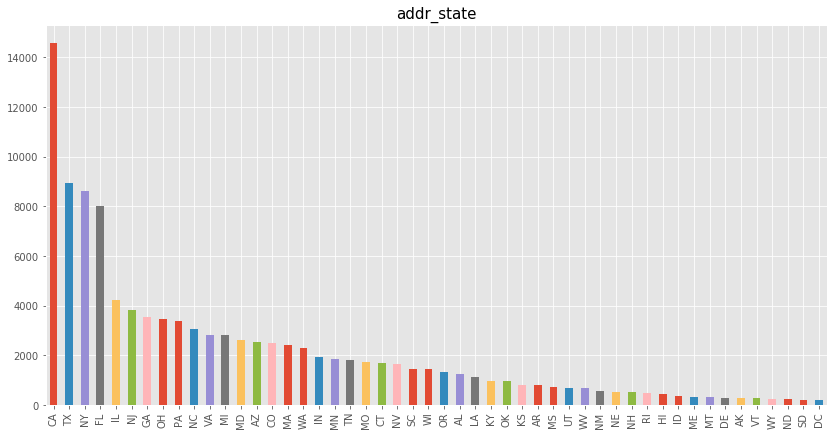

In [40]:
fig = plt.figure(figsize=(14,7))
loan.addr_state.value_counts().plot(kind = 'bar', rot = 90)
plt.title('addr_state',fontsize=15)

In [41]:
# 50 levels under addr_state (50 states)
len(loan.addr_state.unique())

50

### 2.1.2 zip_code
- Summary: 
    - Too many levels under zip_code. Instead, use addr_state to express the similar information.

In [42]:
# Too many levels under zip_code
len(loan.zip_code.unique())

878

In [43]:
loan.zip_code.value_counts()[0:10]

112xx    1175
945xx    1142
750xx    1055
300xx     973
331xx     972
606xx     961
891xx     887
070xx     857
770xx     833
104xx     807
Name: zip_code, dtype: int64

### 2.1.3 emp_length
- Description: Employment length in years. Possible values are between 0 and 10, where 0 means less than one year and 10 means ten or more years. 
- Summary: Most loan applicants have employment length more than 10 years.

Text(0.5,1,'emp_length')

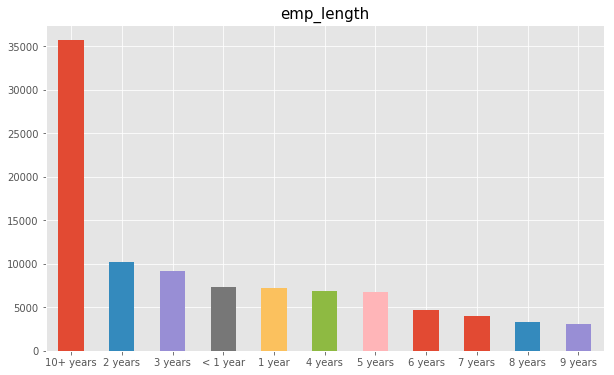

In [44]:
fig = plt.figure(figsize=(10,6))
loan.emp_length.value_counts().plot(kind = 'bar', rot = 360)
plt.title('emp_length',fontsize=15)

### 2.1.4 emp_title
- Description: The job title supplied by the Borrower when applying for the loan.
- Summary: Too many levels under emp_title. Use a basic string preprocessing on it and select top K levels to express more than half of total information.

Text(0.5,1,'emp_title')

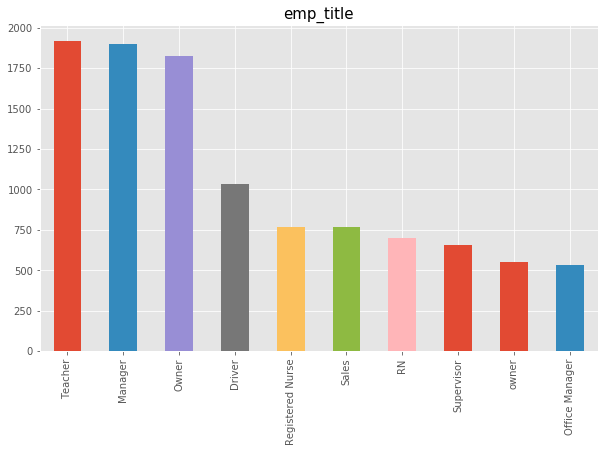

In [45]:
fig = plt.figure(figsize=(10,6))
loan.emp_title.value_counts()[0:10].plot(kind = 'bar', rot = 90)
plt.title('emp_title',fontsize=15)

In [46]:
# Too many levels under emp_title
len(loan.emp_title.unique())

37289

In [47]:
# Top 10 emp_title account for around 10% of total loan applications 
sum(loan.emp_title.value_counts()[0:10]) / loan.shape[0]

0.09880961210413113

### 2.1.5 home_ownership
- Description: The home ownership status provided by the borrower during registration. Possible values are: RENT, OWN, MORTGAGE, and OTHER.
- Summary: Most loan applicants have a mortgage on their houses.

Text(0.5,1,'home_ownership')

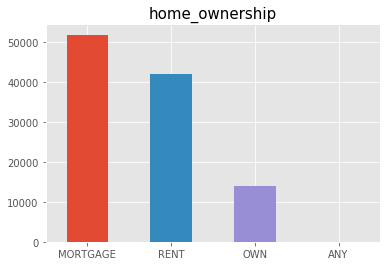

In [48]:
loan.home_ownership.value_counts().plot(kind = 'bar', rot = 360)
plt.title('home_ownership',fontsize=15)

### 2.2 User related feature (financial specific - income)
- 2.2.1 annual_inc
- 2.2.2 annual_inc_joint
- 2.2.3 verification_status
- 2.2.4 verification_status_joint
- 2.2.5 dti
- 2.2.6 dti_joint

### 2.2.1 annual_inc
- Description: The self-reported annual income provided by the borrower during registration.
- Summary: Many outliers and a very skewed distribution.

Text(0.5,1,'Box plot: annual_inc')

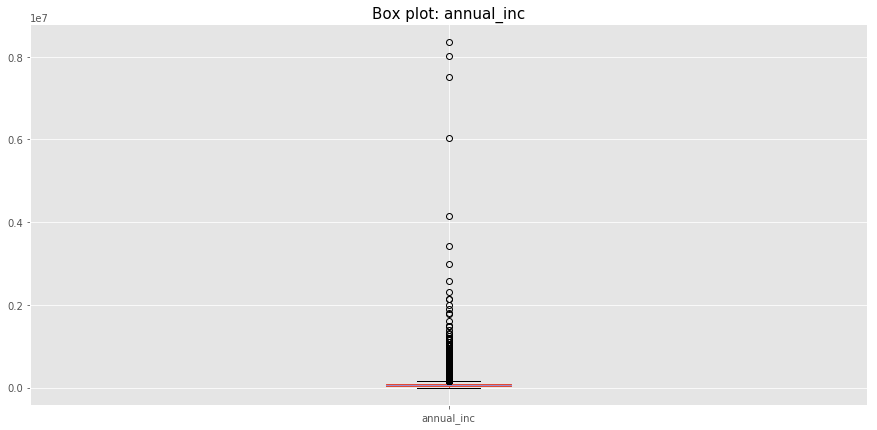

In [49]:
fig = plt.figure(figsize=(15,7))
loan.annual_inc.plot(kind = 'box')
plt.title('Box plot: annual_inc',fontsize=15)

Text(0.5,1,'Density plot: annual_inc')

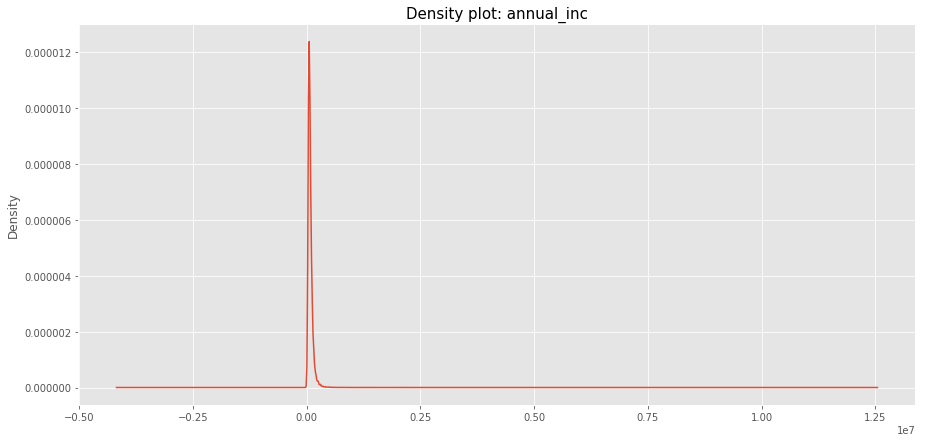

In [50]:
fig = plt.figure(figsize=(15,7))
loan.annual_inc.plot(kind = 'density')
plt.title('Density plot: annual_inc',fontsize=15)

Text(0.5,1,'Density plot: log_annual_inc')

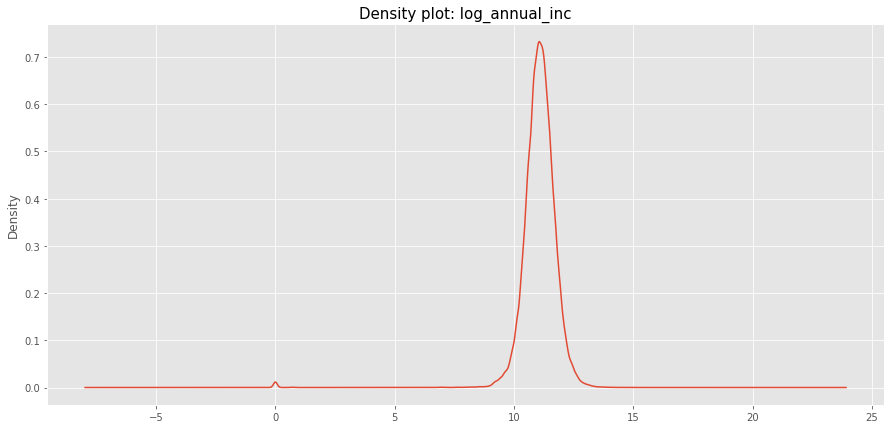

In [51]:
# take log and plot
fig = plt.figure(figsize=(15,7))
np.log(loan.annual_inc + 1).plot(kind = 'density')
plt.title('Density plot: log_annual_inc',fontsize=15)

### 2.2.2 annual_inc_joint
- Description: The combined self-reported annual income provided by the co-borrowers during registration.
- Summary: Same issue as in annual_inc. Many outliers and a very skewed distribution.

Text(0.5,1,'Box plot: annual_inc_joint')

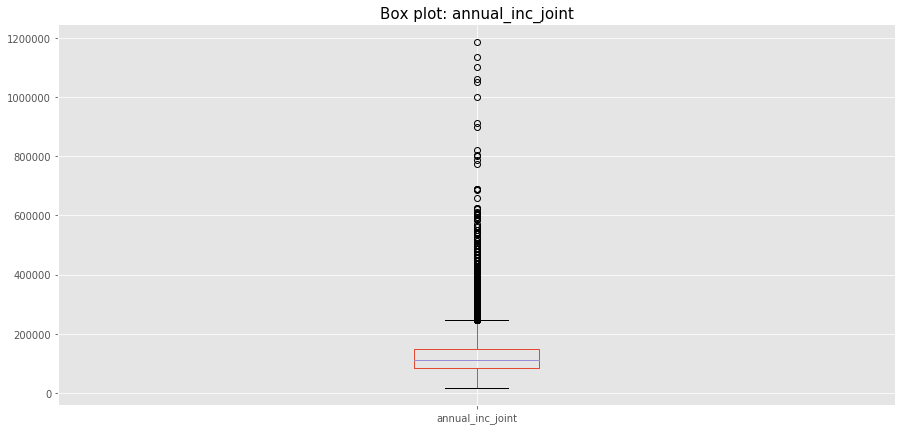

In [52]:
fig = plt.figure(figsize=(15,7))
loan.annual_inc_joint.plot(kind = 'box')
plt.title('Box plot: annual_inc_joint',fontsize=15)

Text(0.5,1,'Density plot: annual_inc_joint')

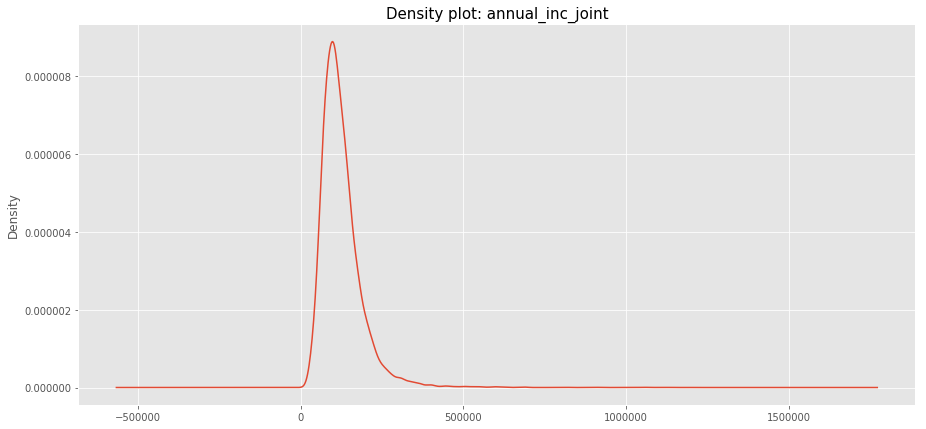

In [53]:
fig = plt.figure(figsize=(15,7))
loan.annual_inc_joint.plot(kind = 'density')
plt.title('Density plot: annual_inc_joint',fontsize=15)

Text(0.5,1,'Density plot: log_annual_inc_joint')

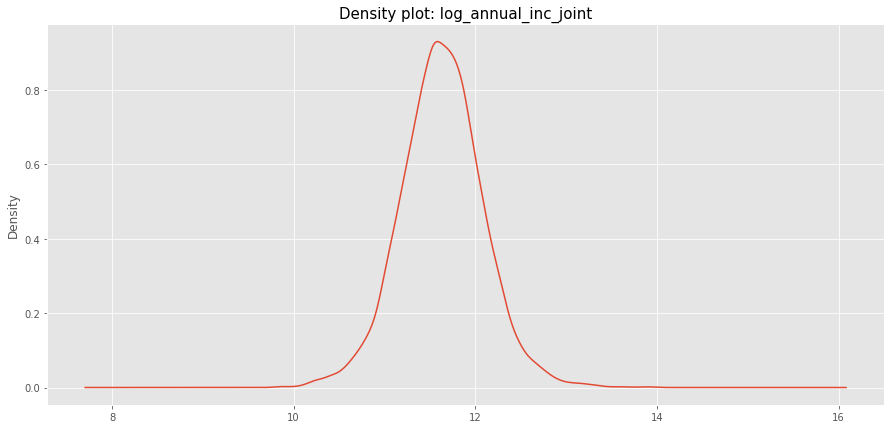

In [54]:
# take log and plot
fig = plt.figure(figsize=(15,7))
np.log(loan.annual_inc_joint + 1).plot(kind = 'density')
plt.title('Density plot: log_annual_inc_joint',fontsize=15)

### 2.2.3 verification_status
- Description: Indicates if income was verified by LC, not verified, or if the income source was verified. 
- Summary: Most loan applicants' income was either Income 'Source Verified' or 'Not Verified'.

Text(0.5,1,'verification_status')

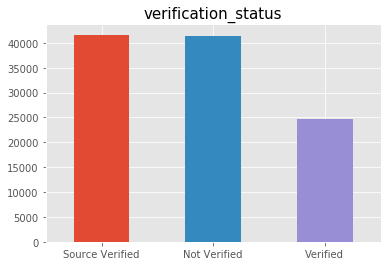

In [56]:
loan.verification_status.value_counts().plot(kind = 'bar', rot = 360)
plt.title('verification_status',fontsize=15)

### 2.2.4 verification_status_joint
- Description: Indicates if the co-borrowers' joint income was verified by LC, not verified, or if the income source was verified
- Summary: Most co-borrowers' joint income were 'not verified' by LC.

Text(0.5,1,'verification_status_joint')

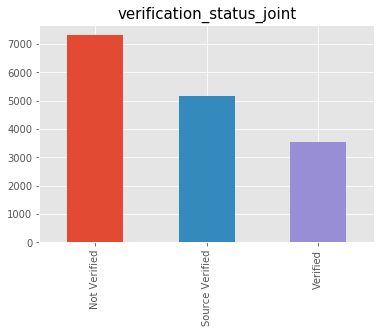

In [57]:
loan.verification_status_joint.value_counts().plot(kind = 'bar', rot = 90)
plt.title('verification_status_joint',fontsize=15)

### 2.2.5 dti
- Description: (debt to income ratio) A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
- Summary: 
    - Many outliers and a very skew distribution under dti .
    - Same issue as in annual_inc, because dti is a ratio of debt to income. (might due to the issue already found in annual_inc).

Text(0.5,1,'Box plot: dti')

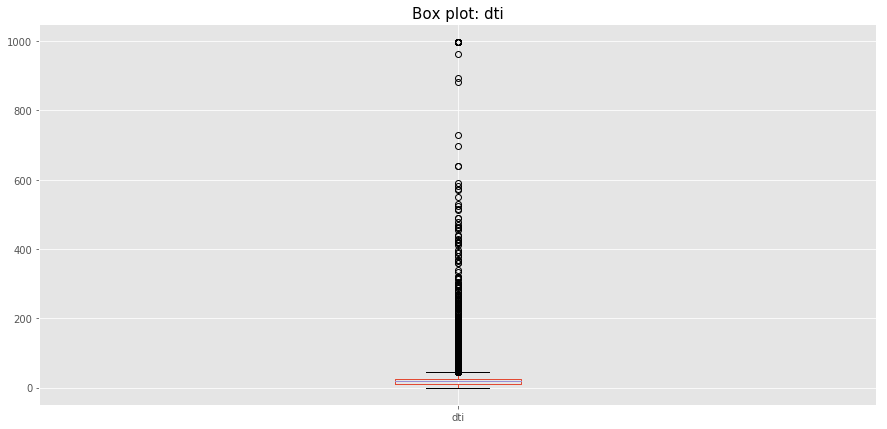

In [58]:
fig = plt.figure(figsize=(15,7))
loan.dti.plot(kind = 'box')
plt.title('Box plot: dti',fontsize=15)

Text(0.5,1,'Density plot: dti')

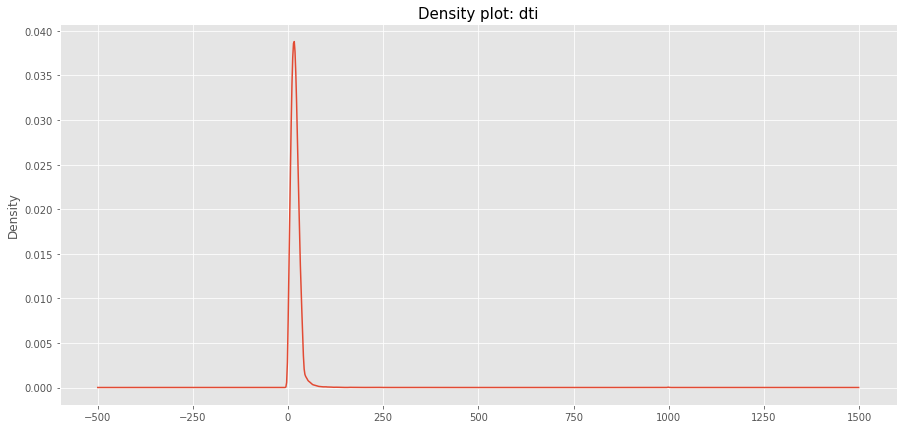

In [59]:
fig = plt.figure(figsize=(15,7))
loan.dti.plot(kind = 'density')
plt.title('Density plot: dti',fontsize=15)

Text(0.5,1,'Density plot: log_dti')

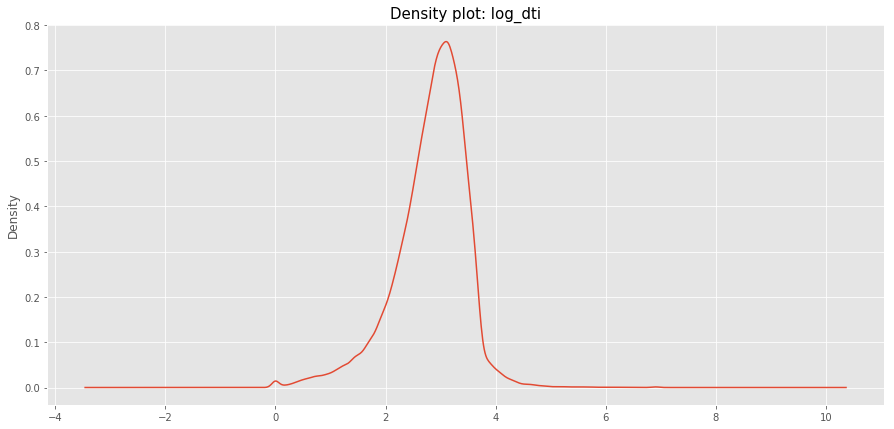

In [60]:
# take log and plot
fig = plt.figure(figsize=(15,7))
np.log(loan.dti + 1).plot(kind = 'density')
plt.title('Density plot: log_dti',fontsize=15)

### 2.2.6 dti_joint
- Description: A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income. 
- Summary: No outlier issue and a distribution close to a normal distribution.

Text(0.5,1,'Box plot: dti_joint')

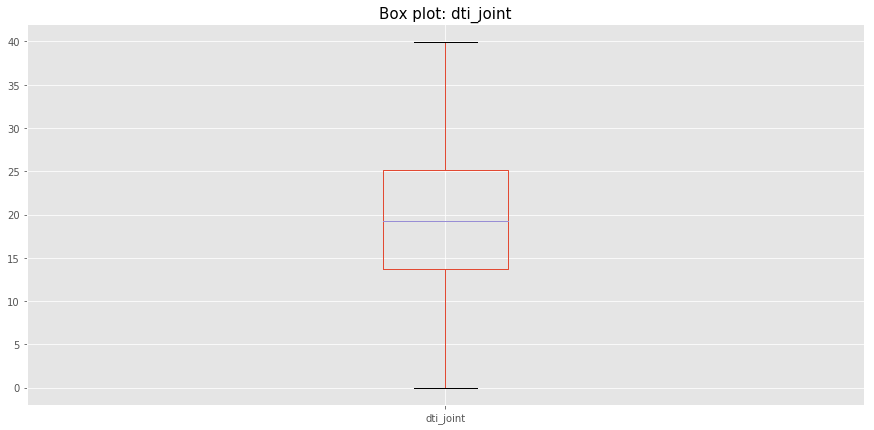

In [61]:
fig = plt.figure(figsize=(15,7))
loan.dti_joint.plot(kind = 'box')
plt.title('Box plot: dti_joint',fontsize=15)

Text(0.5,1,'Density plot: dti_joint')

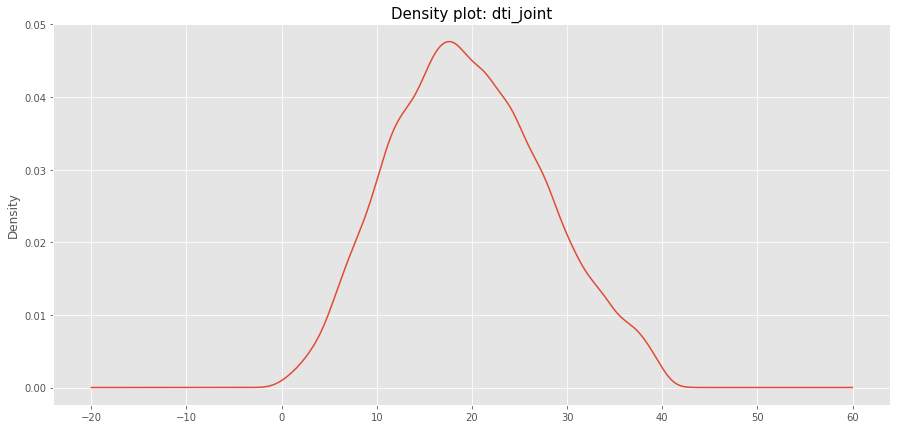

In [62]:
fig = plt.figure(figsize=(15,7))
loan.dti_joint.plot(kind = 'density')
plt.title('Density plot: dti_joint',fontsize=15)

### 2.3 User feature (financial specific - credit scores)
- 2.3.1 earliest_cr_line
- 2.3.2 inq_fi
- 2.3.3 inq_last_12m
- 2.3.4 inq_last_6mths
- 2.3.5 mths_since_recent_inq
- 2.3.6 last_credit_pull_d

### 2.3.1 earliest_cr_line
- Description: The month the borrower's earliest reported credit line was opened. 
- Summary: 
    - It's a datetime type variable ranged from April 1963 to September 2014.
    - **Note: Need a further transformation on it such as compare with other datetime type variables to attain day difference, which might explain more information rather than using itself as a variable.**

Text(0.5,1,'earliest_cr_line')

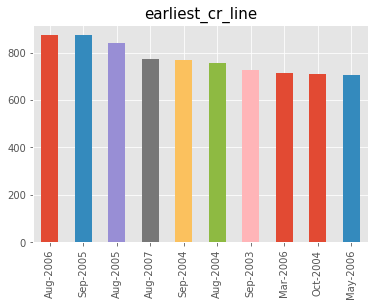

In [63]:
loan.earliest_cr_line.value_counts()[0:10].plot(kind = 'bar', rot = 90)
plt.title('earliest_cr_line',fontsize=15)

In [64]:
print(np.nanmin(loan.earliest_cr_line.values))
print(np.nanmax(loan.earliest_cr_line.values))

Apr-1963
Sep-2014


### 2.3.2 inq_fi
- Description: Number of personal finance inquiries.
- Summary: Most loan applicants inquired 0 time on their personal finance.

Text(0.5,1,'Box plot: inq_fi')

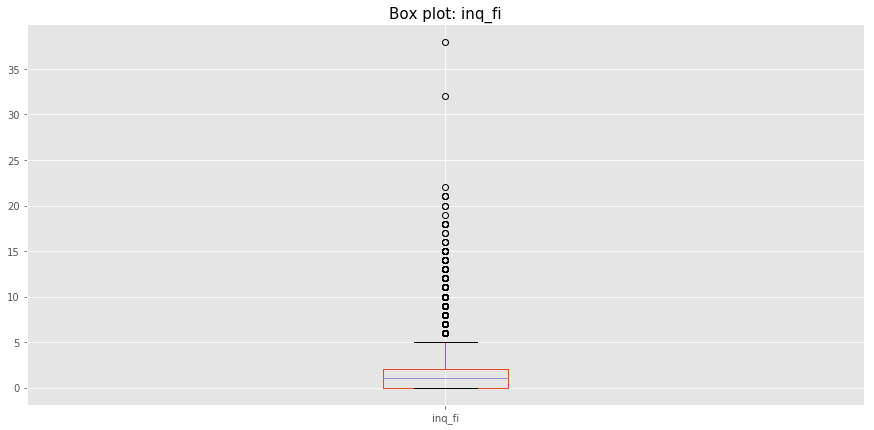

In [65]:
fig = plt.figure(figsize=(15,7))
loan.inq_fi.plot(kind = 'box')
plt.title('Box plot: inq_fi',fontsize=15)

Text(0.5,1,'inq_fi')

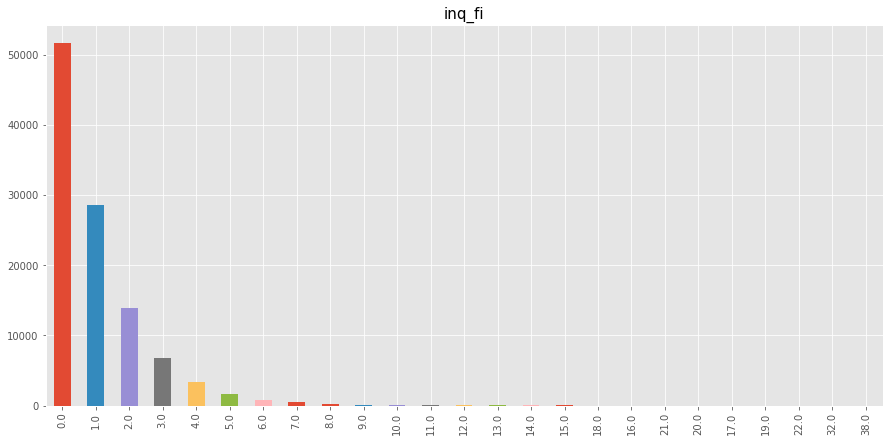

In [66]:
fig = plt.figure(figsize=(15,7))
loan.inq_fi.value_counts().plot(kind = 'bar', rot = 90)
plt.title('inq_fi',fontsize=15)

### 2.3.3 inq_last_12m
- Description: Number of credit inquiries in past 12 months
- Summary: Most loan applicants inquired 0 time on their credit information during past 12 months.

Text(0.5,1,'Box plot: inq_last_12m')

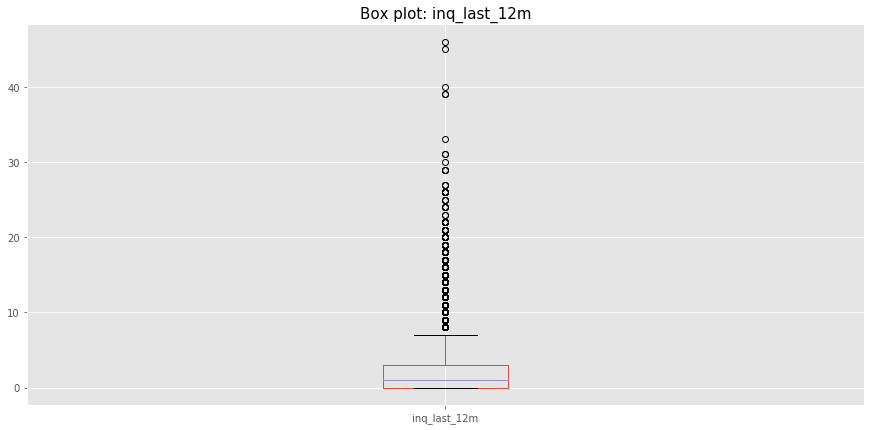

In [67]:
fig = plt.figure(figsize=(15,7))
loan.inq_last_12m.plot(kind = 'box')
plt.title('Box plot: inq_last_12m',fontsize=15)

Text(0.5,1,'inq_last_12m')

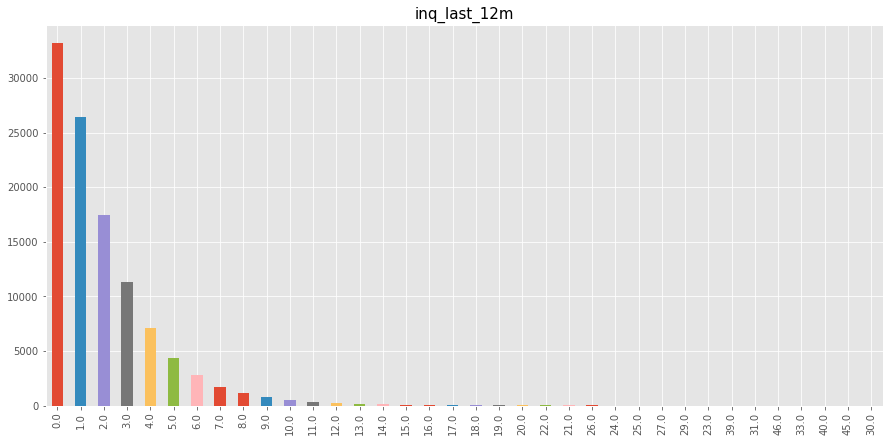

In [68]:
fig = plt.figure(figsize=(15,7))
loan.inq_last_12m.value_counts().plot(kind = 'bar', rot = 90)
plt.title('inq_last_12m',fontsize=15)

### 2.3.4 inq_last_6mths
- Description: The number of inquiries in past 6 months (excluding auto and mortgage inquiries).
- Summary: Most loan applicants inquired 0 time during past 6 months.

Text(0.5,1,'Box plot: inq_last_6mths')

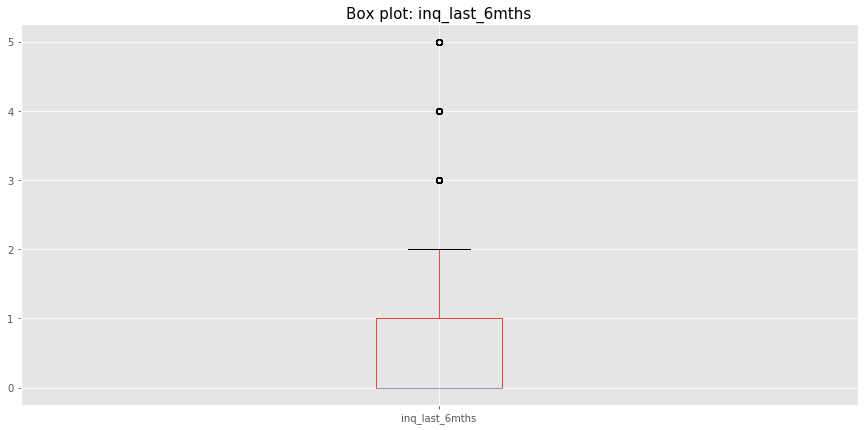

In [69]:
fig = plt.figure(figsize=(15,7))
loan.inq_last_6mths.plot(kind = 'box')
plt.title('Box plot: inq_last_6mths',fontsize=15)

Text(0.5,1,'inq_last_6mths')

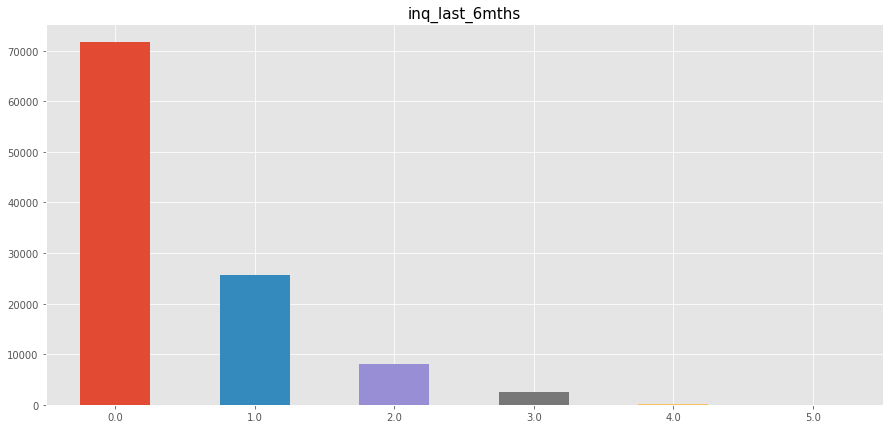

In [70]:
fig = plt.figure(figsize=(15,7))
loan.inq_last_6mths.value_counts().plot(kind = 'bar', rot = 360)
plt.title('inq_last_6mths',fontsize=15)

### 2.3.5 mths_since_recent_inq
- Description: Months since most recent inquiry.
- Summary: Months since most recent inquiry for most loan applicants are close to recent, from 0 to 5 months.

Text(0.5,1,'Box plot: mths_since_recent_inq')

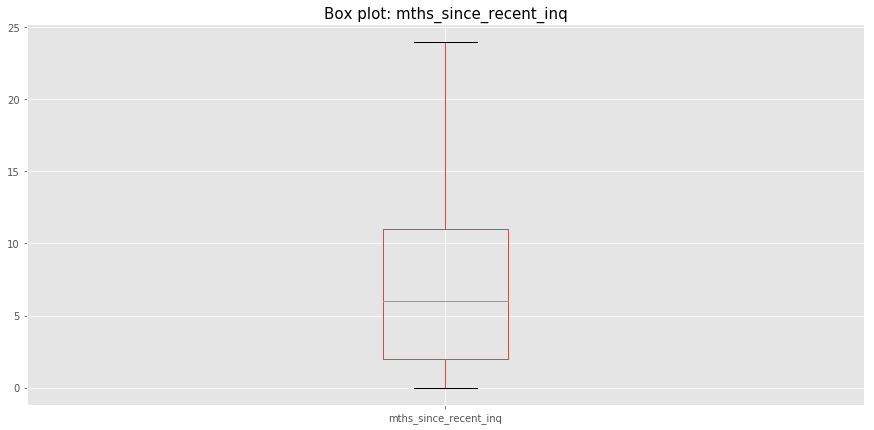

In [71]:
fig = plt.figure(figsize=(15,7))
loan.mths_since_recent_inq.plot(kind = 'box')
plt.title('Box plot: mths_since_recent_inq',fontsize=15)

Text(0.5,1,'mths_since_recent_inq')

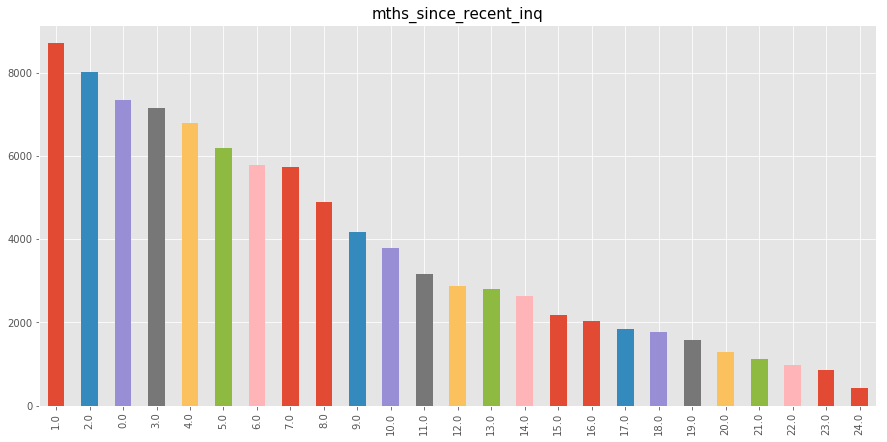

In [72]:
fig = plt.figure(figsize=(15,7))
loan.mths_since_recent_inq.value_counts().plot(kind = 'bar', rot = 90)
plt.title('mths_since_recent_inq',fontsize=15)

### 2.3.6 last_credit_pull_d
- Description: The most recent month LC pulled credit for this loan.
- Summary: LC pulled credit for loans on July 2018 mostly.

Text(0.5,1,'last_credit_pull_d')

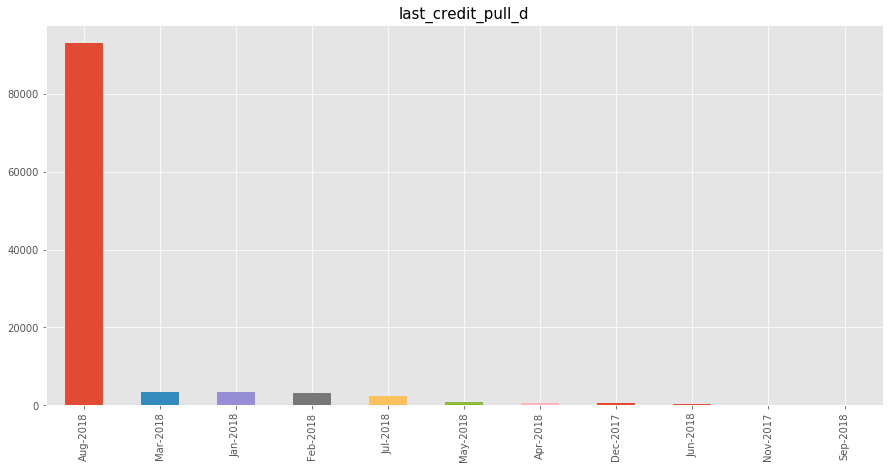

In [73]:
fig = plt.figure(figsize=(15,7))
loan.last_credit_pull_d.value_counts().plot(kind = 'bar', rot = 90)
plt.title('last_credit_pull_d',fontsize=15)

### 2.4 User feature (financial specific - credit lines)
- 2.4.1 total_acc
- 2.4.2 avg_cur_bal
- 2.4.3 tot_cur_bal
- 2.4.4 mo_sin_rcnt_tl
- 2.4.5 mort_acc
- 2.4.6 bc_util
- 2.4.7 all_util
- 2.4.8 open_acc
- 2.4.9 open_acc_6m
- 2.4.10 acc_open_past_24mths
- 2.4.11 total_cu_tl
- 2.4.12 mths_since_recent_bc
- 2.4.13 mths_since_recent_bc_dlq
- 2.4.14 num_accts_ever_120_pd
- 2.4.15 num_actv_bc_tl
- 2.4.16 num_bc_sats
- 2.4.17 num_bc_tl
- 2.4.18 num_sats
- 2.4.19 num_tl_120dpd_2m
- 2.4.20 num_tl_30dpd
- 2.4.21 num_tl_90g_dpd_24m
- 2.4.22 num_tl_op_past_12m
- 2.4.23 percent_bc_gt_75
- 2.4.24 tax_liens
- 2.4.25 tot_hi_cred_lim
- 2.4.26 total_bal_ex_mort
- 2.4.27 total_bc_limit

### 2.4.1 total_acc
- Description: The total number of credit lines currently in the borrower's credit file.
- Summary: Many outliers under total_acc, but it has a distribution close to a normal distribution.

Text(0.5,1,'Box plot: total_acc')

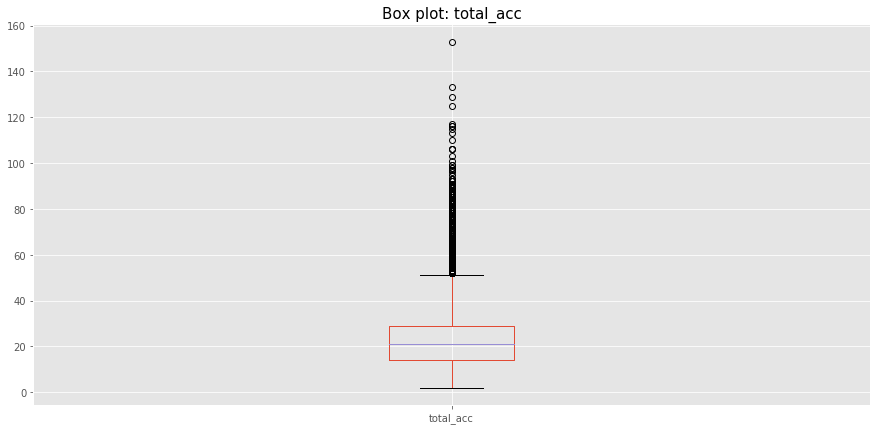

In [74]:
fig = plt.figure(figsize=(15,7))
loan.total_acc.plot(kind = 'box')
plt.title('Box plot: total_acc',fontsize=15)

Text(0.5,1,'Density plot: total_acc')

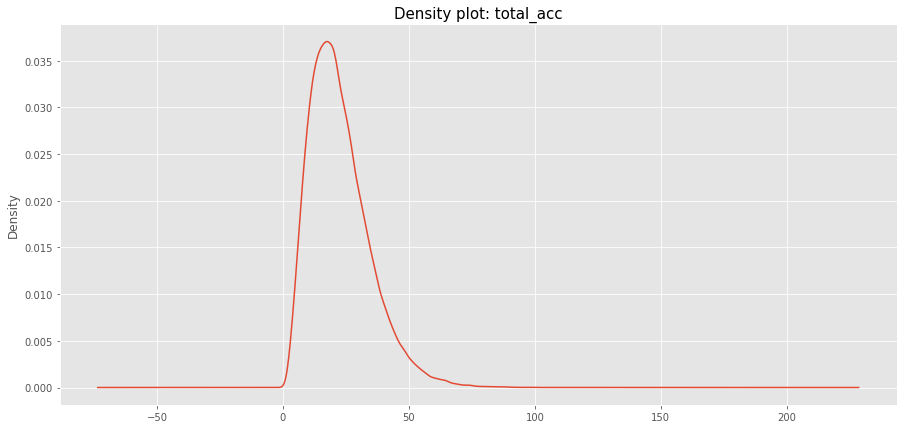

In [75]:
fig = plt.figure(figsize=(15,7))
loan.total_acc.plot(kind = 'density')
plt.title('Density plot: total_acc',fontsize=15)

### 2.4.2 avg_cur_bal
- Description: Average current balance of all accounts.
- Summary: Many outliers and a very skewed distribution.

Text(0.5,1,'Box plot: avg_cur_bal')

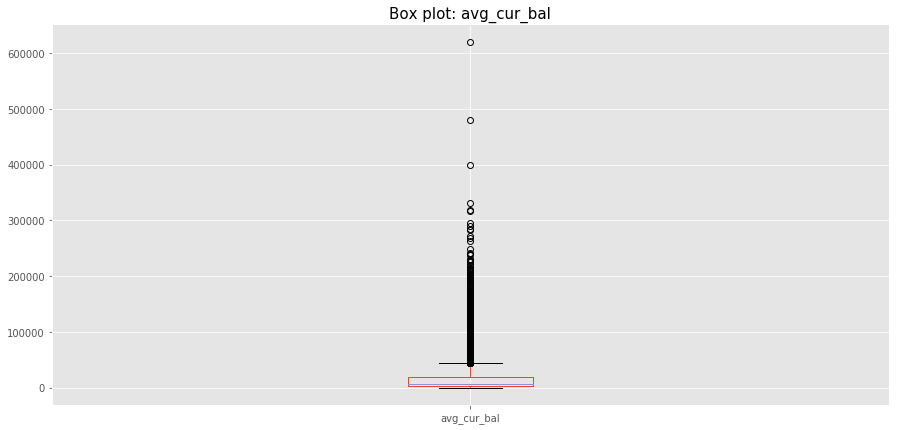

In [76]:
fig = plt.figure(figsize=(15,7))
loan.avg_cur_bal.plot(kind = 'box')
plt.title('Box plot: avg_cur_bal',fontsize=15)

Text(0.5,1,'Density plot: avg_cur_bal')

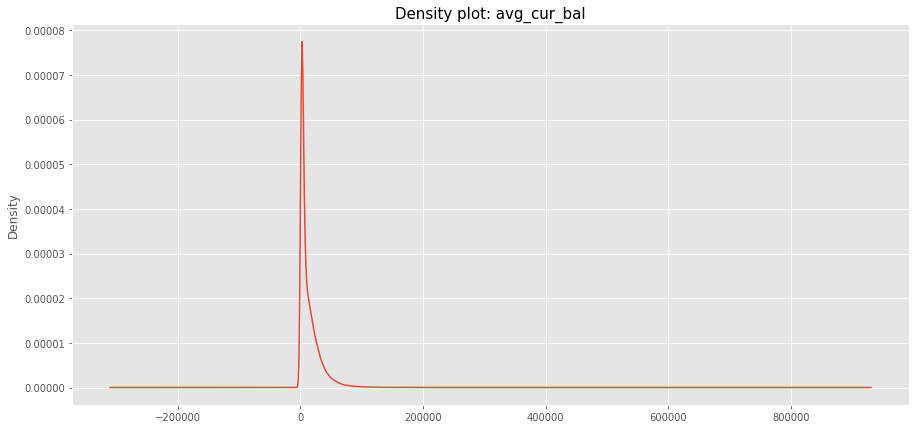

In [77]:
fig = plt.figure(figsize=(15,7))
loan.avg_cur_bal.plot(kind = 'density')
plt.title('Density plot: avg_cur_bal',fontsize=15)

### 2.4.3 tot_cur_bal
- Description: Total current balance of all accounts. 
- Summary: Many outliers and a very skewed distribution.

Text(0.5,1,'Box plot: tot_cur_bal')

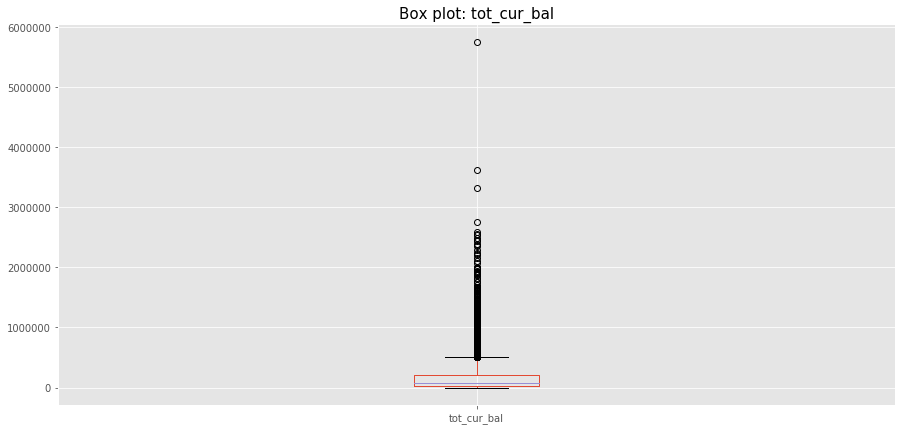

In [80]:
fig = plt.figure(figsize=(15,7))
loan.tot_cur_bal.plot(kind = 'box')
plt.title('Box plot: tot_cur_bal',fontsize=15)

Text(0.5,1,'Density plot: tot_cur_bal')

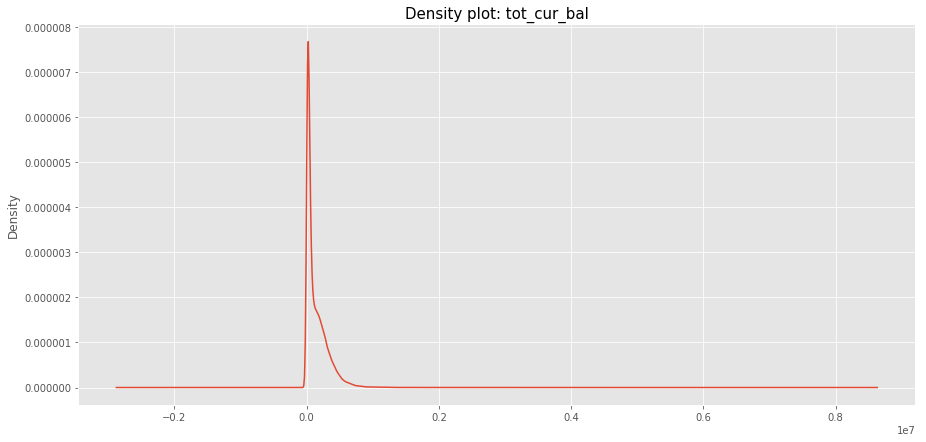

In [81]:
fig = plt.figure(figsize=(15,7))
loan.tot_cur_bal.plot(kind = 'density')
plt.title('Density plot: tot_cur_bal',fontsize=15)

### 2.4.4 mo_sin_rcnt_tl
- Description: Months since most recent account opened.
- Summary: Many outliers and a very skewed distribution.

Text(0.5,1,'Box plot: mo_sin_rcnt_tl')

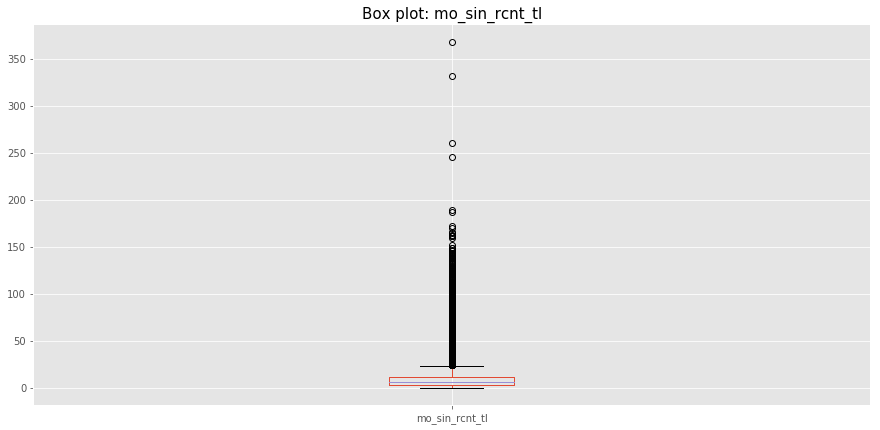

In [83]:
fig = plt.figure(figsize=(15,7))
loan.mo_sin_rcnt_tl.plot(kind = 'box')
plt.title('Box plot: mo_sin_rcnt_tl',fontsize=15)

Text(0.5,1,'Density plot: mo_sin_rcnt_tl')

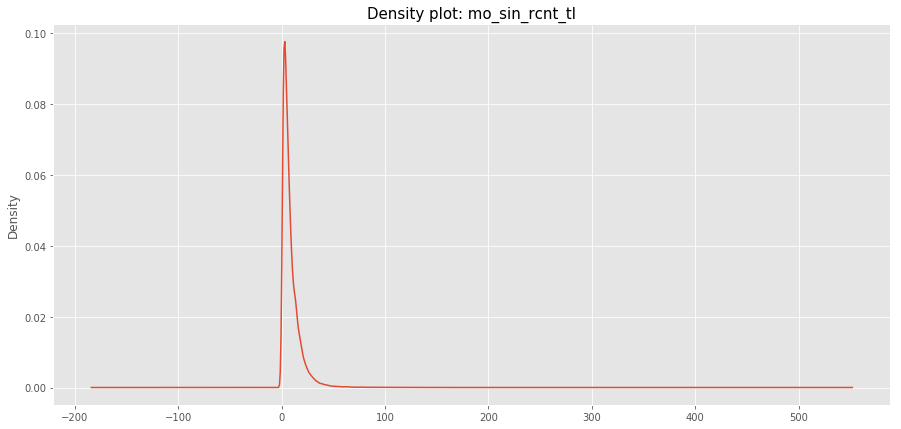

In [84]:
fig = plt.figure(figsize=(15,7))
loan.mo_sin_rcnt_tl.plot(kind = 'density')
plt.title('Density plot: mo_sin_rcnt_tl',fontsize=15)

### 2.4.5 mort_acc
- Description: Number of mortgage accounts.
- Summary: Many outliers and a very skewed distribution. Most loan applicants have 0 mortgage accounts.

Text(0.5,1,'Box plot: mort_acc')

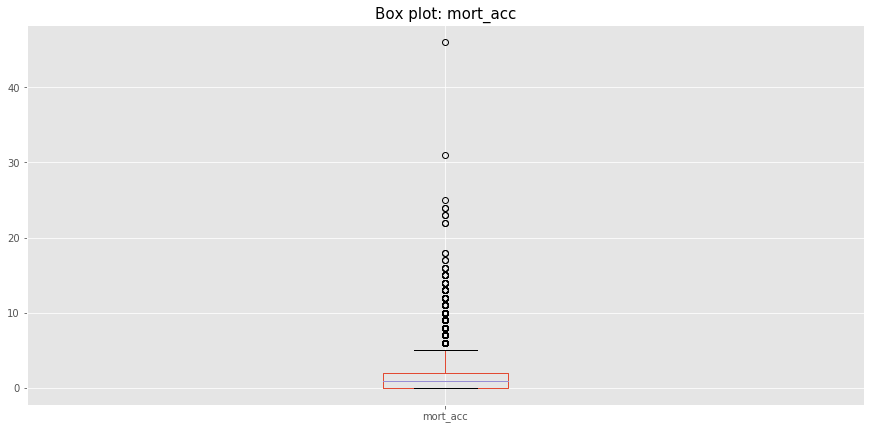

In [85]:
fig = plt.figure(figsize=(15,7))
loan.mort_acc.plot(kind = 'box')
plt.title('Box plot: mort_acc',fontsize=15)

Text(0.5,1,'Bar plot: mort_acc')

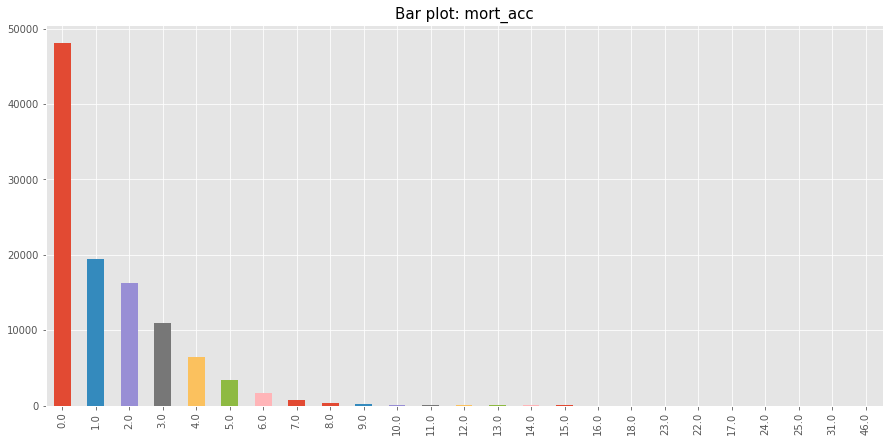

In [89]:
fig = plt.figure(figsize=(15,7))
loan.mort_acc.value_counts().plot(kind = 'bar')
plt.title('Bar plot: mort_acc',fontsize=15)

Text(0.5,1,'Density plot: mort_acc')

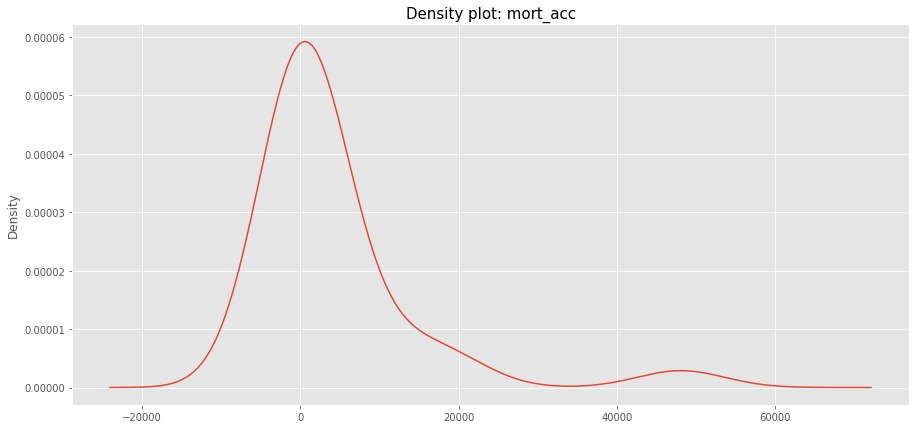

In [88]:
fig = plt.figure(figsize=(15,7))
np.sqrt(loan.mort_acc + 1).value_counts().plot(kind = 'density')
plt.title('Density plot: mort_acc',fontsize=15)

### 2.4.6 bc_util
- Description: Ratio of total current balance to high credit/credit limit for all bankcard accounts.
- Summary: Few outilers under bc_util.

Text(0.5,1,'Box plot: bc_util')

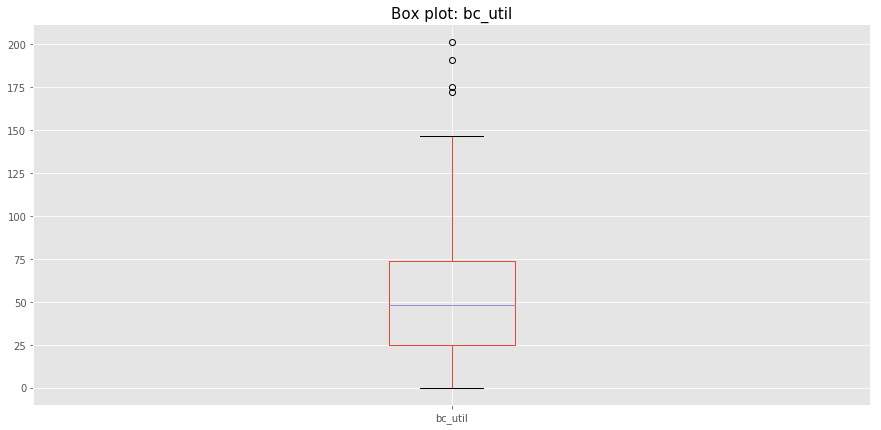

In [90]:
fig = plt.figure(figsize=(15,7))
loan.bc_util.plot(kind = 'box')
plt.title('Box plot: bc_util',fontsize=15)

Text(0.5,1,'Density plot: bc_util')

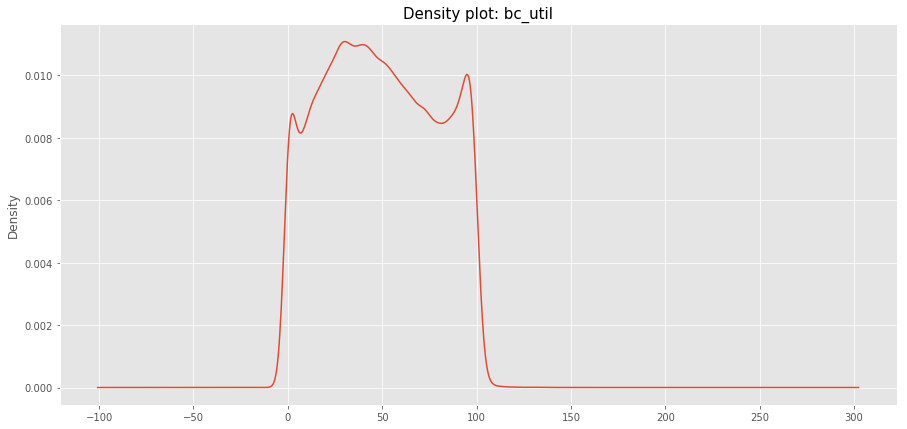

In [91]:
fig = plt.figure(figsize=(15,7))
loan.bc_util.plot(kind = 'density')
plt.title('Density plot: bc_util',fontsize=15)

### 2.4.7 all_util
- Description: Balance to credit limit on all trades.
- Summary: Few outilers under all_util.

Text(0.5,1,'Box plot: all_util')

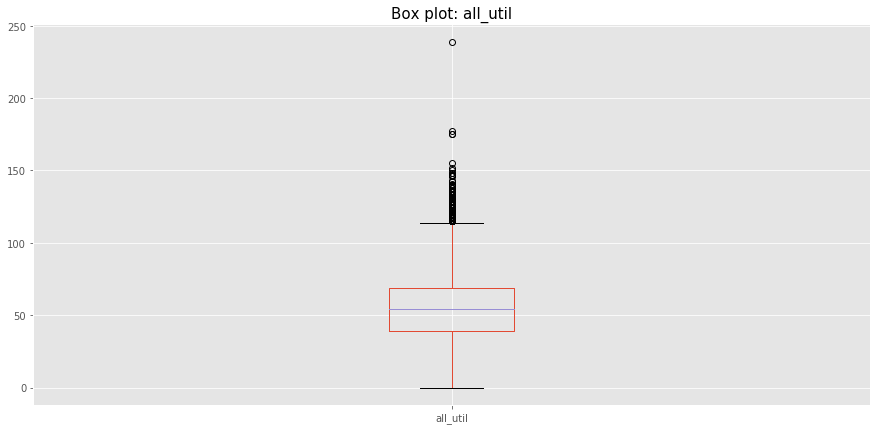

In [92]:
fig = plt.figure(figsize=(15,7))
loan.all_util.plot(kind = 'box')
plt.title('Box plot: all_util',fontsize=15)

Text(0.5,1,'Density plot: all_util')

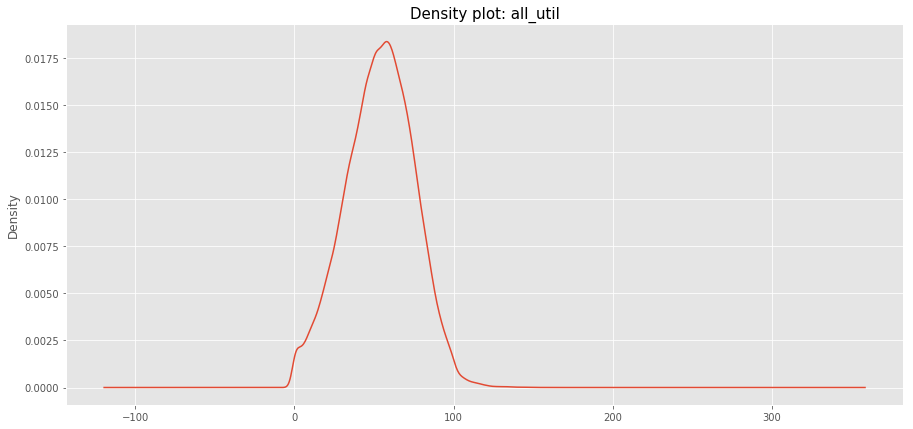

In [93]:
fig = plt.figure(figsize=(15,7))
loan.all_util.plot(kind = 'density')
plt.title('Density plot: all_util',fontsize=15)

### 2.4.8 open_acc
- Description: The number of open credit lines in the borrower's credit file.
- Summary: Most loan applicants have 7 to 11 opened credit lines.

Text(0.5,1,'Box plot: open_acc')

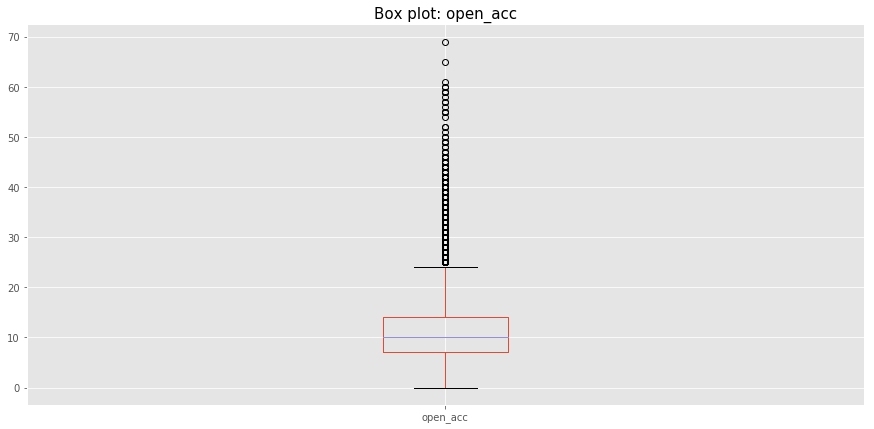

In [94]:
fig = plt.figure(figsize=(15,7))
loan.open_acc.plot(kind = 'box')
plt.title('Box plot: open_acc',fontsize=15)

Text(0.5,1,'Bar plot: open_acc')

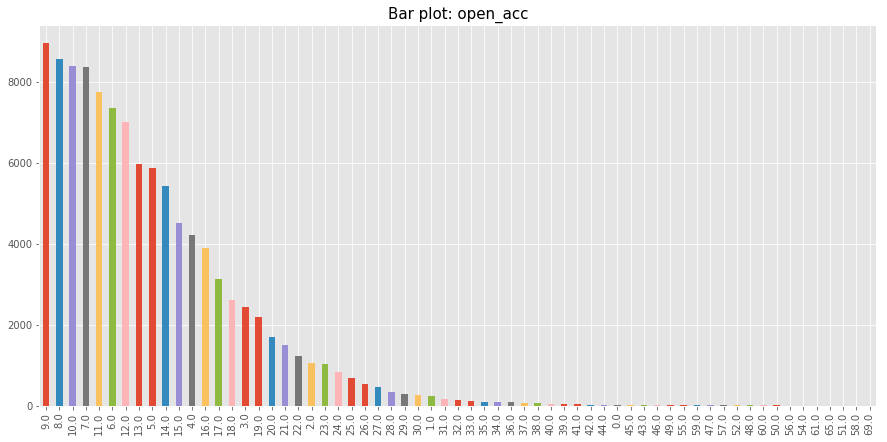

In [99]:
fig = plt.figure(figsize=(15,7))
loan.open_acc.value_counts().plot(kind = 'bar')
plt.title('Bar plot: open_acc',fontsize=15)

### 2.4.9 open_acc_6m
- Description: Number of open trades in last 6 months. 
- Summary: Few outliers under open_acc_6m. Most loan applicants have 0 open trade in last 6 months.

Text(0.5,1,'Box plot: open_acc_6m')

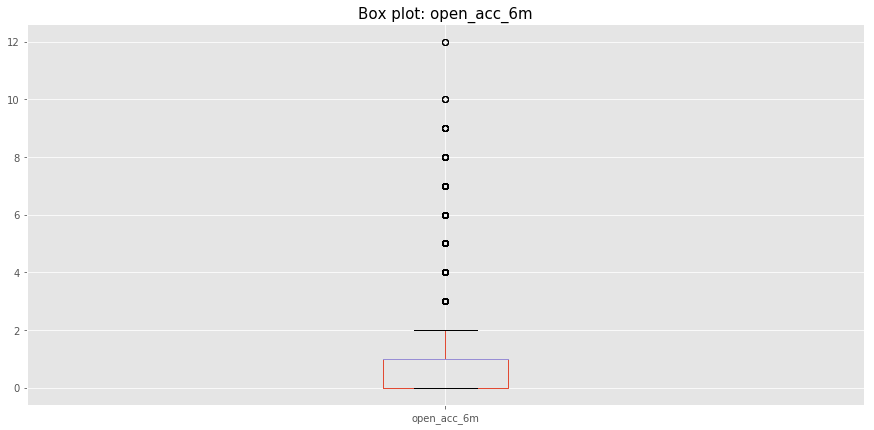

In [96]:
fig = plt.figure(figsize=(15,7))
loan.open_acc_6m.plot(kind = 'box')
plt.title('Box plot: open_acc_6m',fontsize=15)

Text(0.5,1,'Bar plot: open_acc_6m')

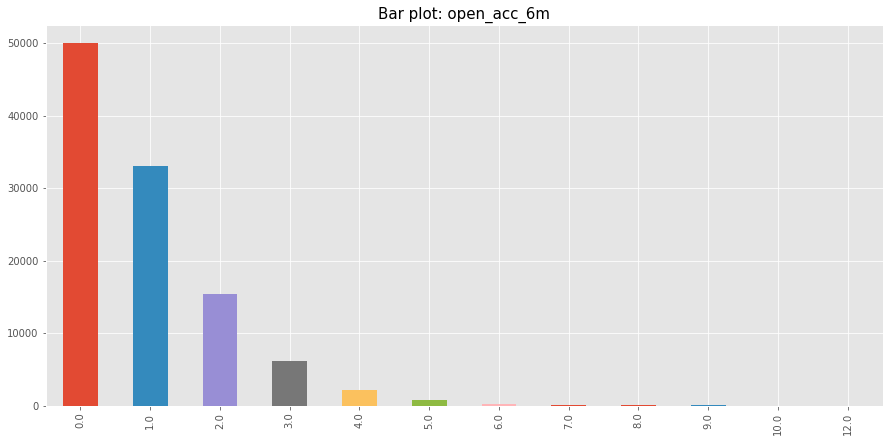

In [98]:
fig = plt.figure(figsize=(15,7))
loan.open_acc_6m.value_counts().plot(kind = 'bar')
plt.title('Bar plot: open_acc_6m',fontsize=15)

### 2.4.10 acc_open_past_24mths
- Description: Number of trades opened in past 24 months.
- Summary: Few outliers under acc_open_past_24mths. Most loan applicants have 1 to 5 open trades in past 24 months.

Text(0.5,1,'Box plot: acc_open_past_24mths')

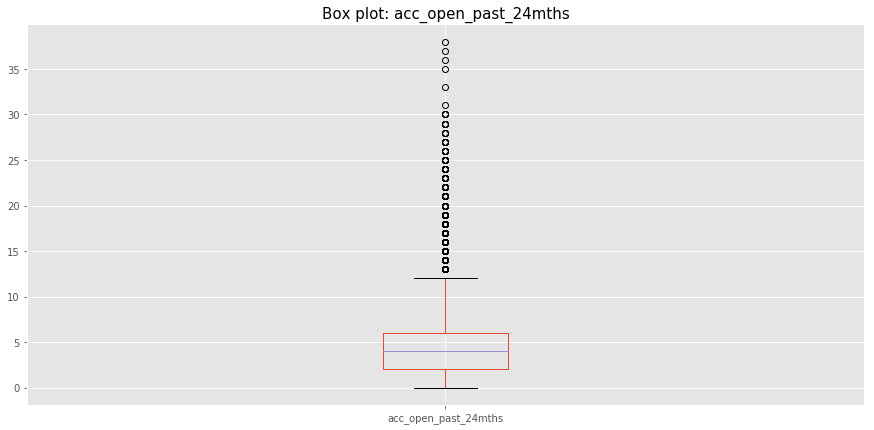

In [100]:
fig = plt.figure(figsize=(15,7))
loan.acc_open_past_24mths.plot(kind = 'box')
plt.title('Box plot: acc_open_past_24mths',fontsize=15)

Text(0.5,1,'Bar plot: acc_open_past_24mths')

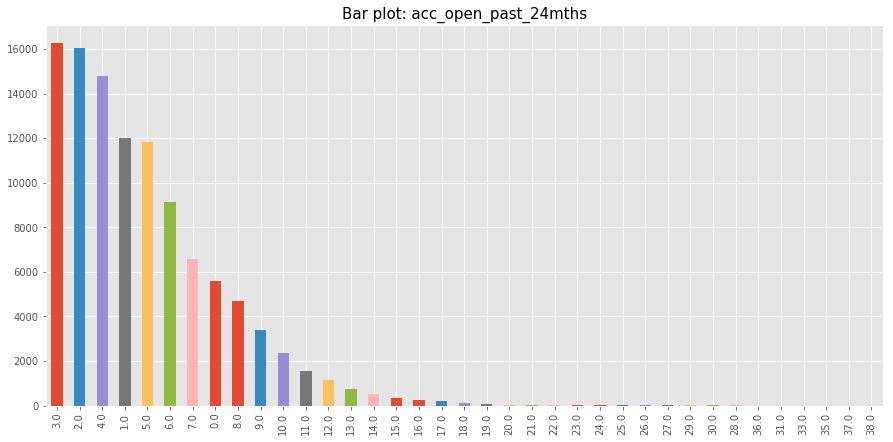

In [101]:
fig = plt.figure(figsize=(15,7))
loan.acc_open_past_24mths.value_counts().plot(kind = 'bar')
plt.title('Bar plot: acc_open_past_24mths',fontsize=15)

### 2.4.11 total_cu_tl
- Description: Number of finance trades.
- Summary: Many outliers under total_cu_tl. Most loan applicants have 0 finance trade.

Text(0.5,1,'Box plot: total_cu_tl')

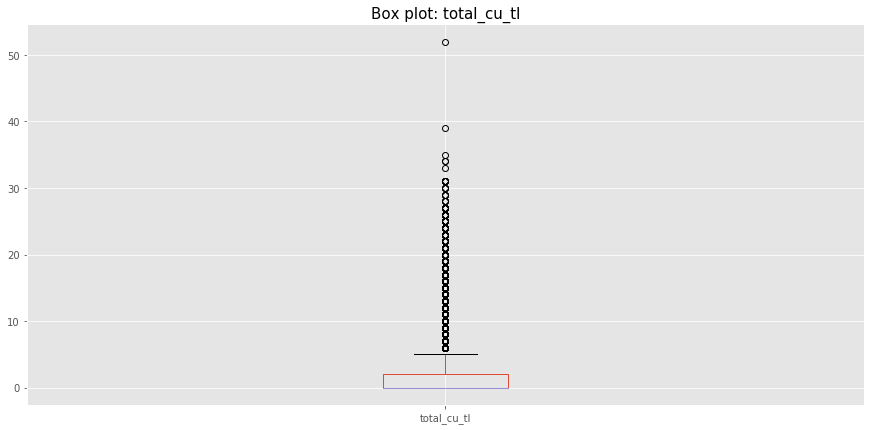

In [102]:
fig = plt.figure(figsize=(15,7))
loan.total_cu_tl.plot(kind = 'box')
plt.title('Box plot: total_cu_tl',fontsize=15)

Text(0.5,1,'Bar plot: total_cu_tl')

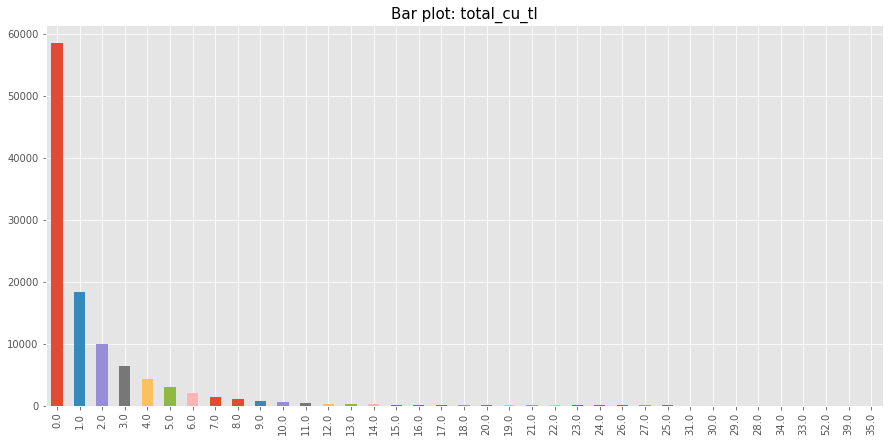

In [104]:
fig = plt.figure(figsize=(15,7))
loan.total_cu_tl.value_counts().plot(kind = 'bar')
plt.title('Bar plot: total_cu_tl',fontsize=15)

### 2.4.12 mths_since_recent_bc
- Description: Months since most recent bankcard account opened.
- Summary: Many outliers and a very skewed distribution.

Text(0.5,1,'Box plot: mths_since_recent_bc')

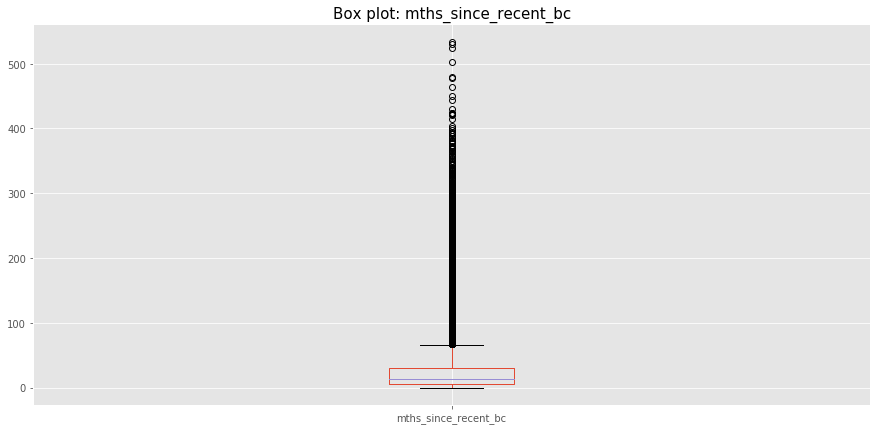

In [105]:
fig = plt.figure(figsize=(15,7))
loan.mths_since_recent_bc.plot(kind = 'box')
plt.title('Box plot: mths_since_recent_bc',fontsize=15)

Text(0.5,1,'Density plot: mths_since_recent_bc')

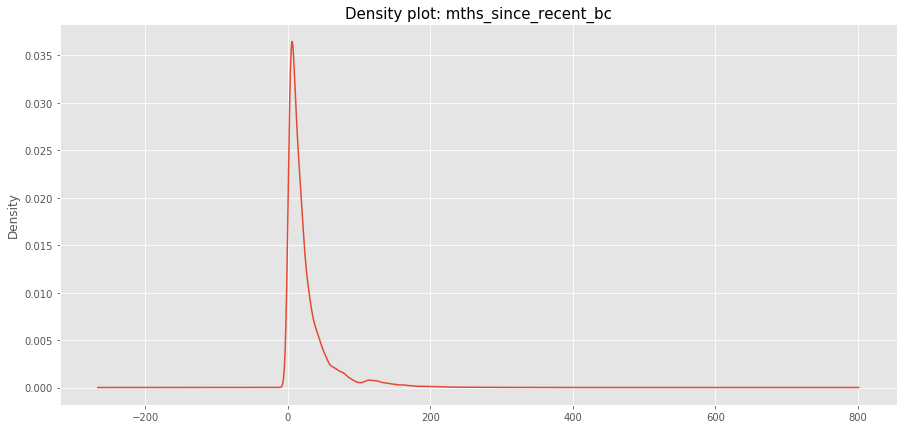

In [106]:
fig = plt.figure(figsize=(15,7))
loan.mths_since_recent_bc.plot(kind = 'density')
plt.title('Density plot: mths_since_recent_bc',fontsize=15)

### 2.4.13 mths_since_recent_bc_dlq
- Description: Months since most recent bankcard delinquency.
- Summary: Many outliers under mths_since_recent_bc_dlq.

Text(0.5,1,'Box plot: mths_since_recent_bc_dlq')

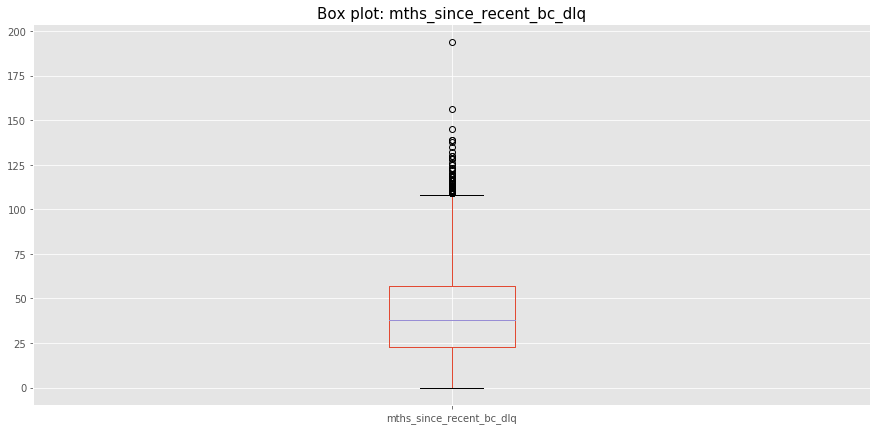

In [107]:
fig = plt.figure(figsize=(15,7))
loan.mths_since_recent_bc_dlq.plot(kind = 'box')
plt.title('Box plot: mths_since_recent_bc_dlq',fontsize=15)

Text(0.5,1,'Density plot: mths_since_recent_bc_dlq')

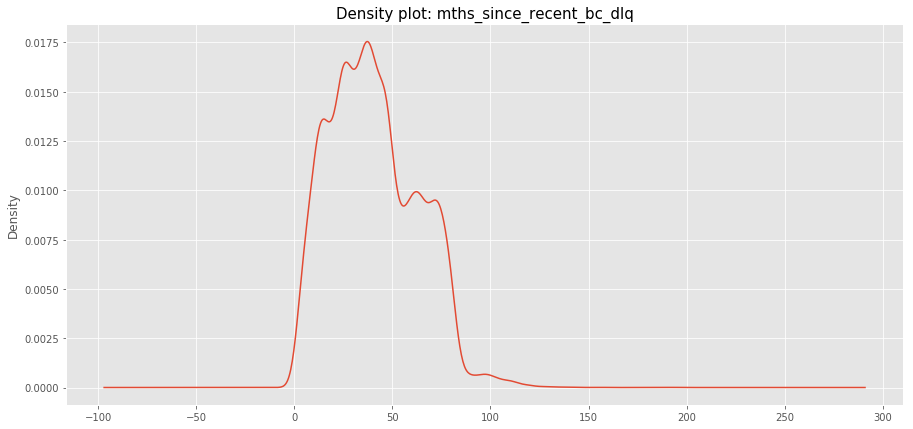

In [108]:
fig = plt.figure(figsize=(15,7))
loan.mths_since_recent_bc_dlq.plot(kind = 'density')
plt.title('Density plot: mths_since_recent_bc_dlq',fontsize=15)

### 2.4.14 num_accts_ever_120_pd
- Description: Number of accounts ever 120 or more days past due.
- Summary: Many outliers under num_accts_ever_120_pd. Most loan applicants have no account ever 120 or more days past due.

Text(0.5,1,'Box plot: num_accts_ever_120_pd')

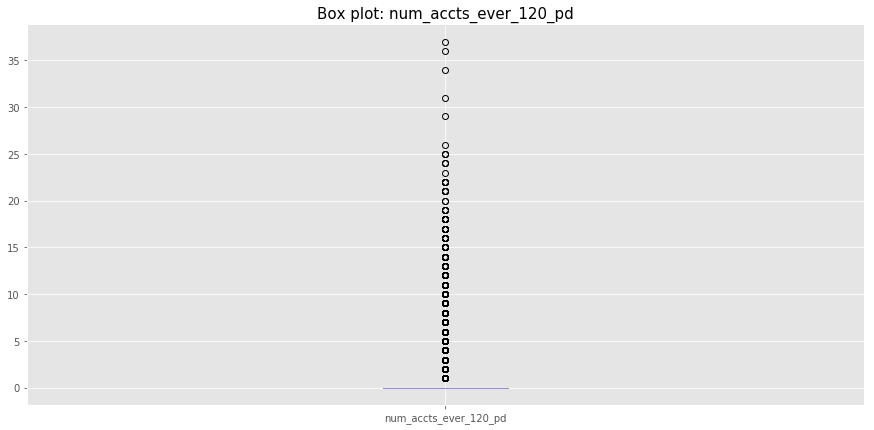

In [109]:
fig = plt.figure(figsize=(15,7))
loan.num_accts_ever_120_pd.plot(kind = 'box')
plt.title('Box plot: num_accts_ever_120_pd',fontsize=15)

Text(0.5,1,'Bar plot: num_accts_ever_120_pd')

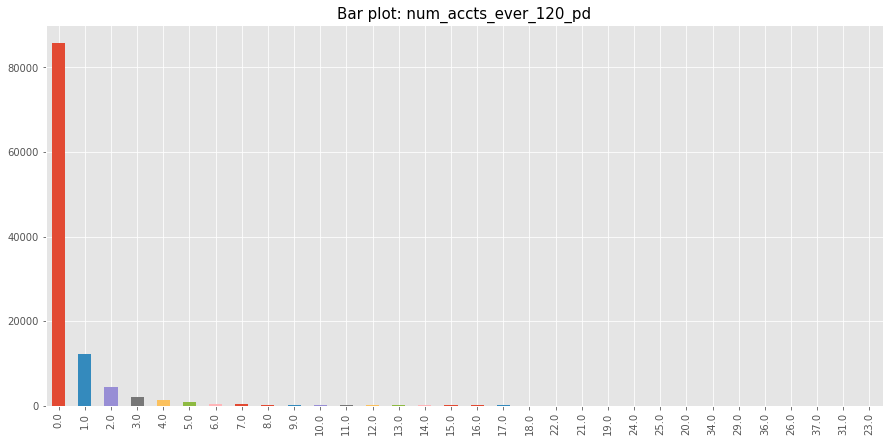

In [111]:
fig = plt.figure(figsize=(15,7))
loan.num_accts_ever_120_pd.value_counts().plot(kind = 'bar')
plt.title('Bar plot: num_accts_ever_120_pd',fontsize=15)

### 2.4.15 num_actv_bc_tl
- Description: Number of currently active bankcard accounts.
- Summary: Few outliers under num_actv_bc_tl. Most loan applicants have 1 to 5 active bankcard accounts.

Text(0.5,1,'Box plot: num_actv_bc_tl')

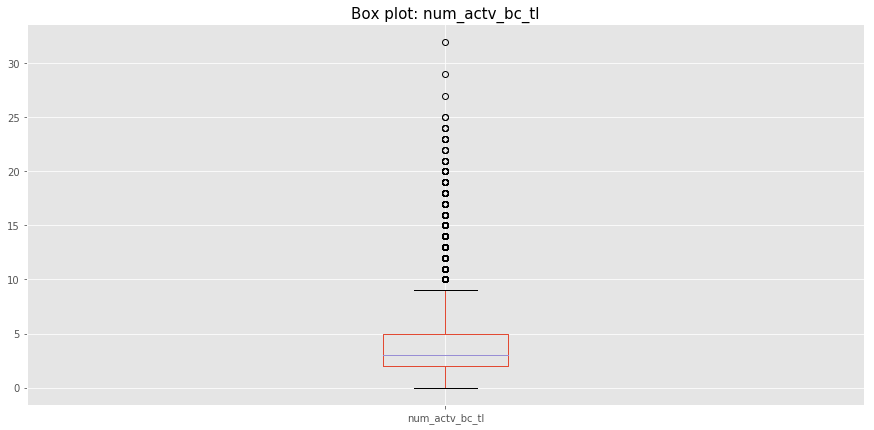

In [112]:
fig = plt.figure(figsize=(15,7))
loan.num_actv_bc_tl.plot(kind = 'box')
plt.title('Box plot: num_actv_bc_tl',fontsize=15)

Text(0.5,1,'Bar plot: num_actv_bc_tl')

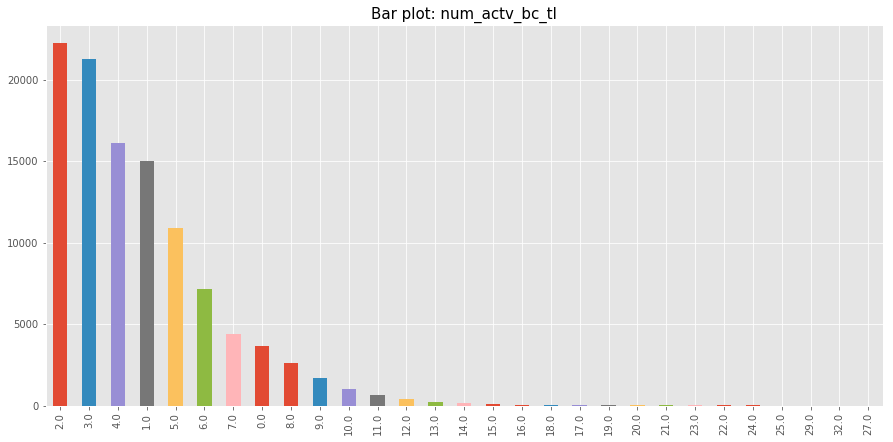

In [113]:
fig = plt.figure(figsize=(15,7))
loan.num_actv_bc_tl.value_counts().plot(kind = 'bar')
plt.title('Bar plot: num_actv_bc_tl',fontsize=15)

### 2.4.16 num_bc_sats
- Description: Number of satisfactory bankcard accounts.
- Summary: Few outliers under num_actv_bc_tl. Most loan applicants have 2 to 6 satisfactory bankcard accounts.

Text(0.5,1,'Box plot: num_bc_sats')

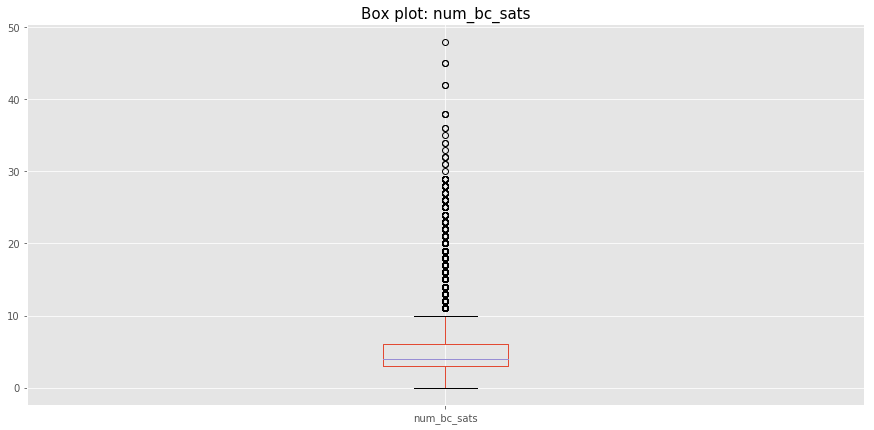

In [114]:
fig = plt.figure(figsize=(15,7))
loan.num_bc_sats.plot(kind = 'box')
plt.title('Box plot: num_bc_sats',fontsize=15)

Text(0.5,1,'Bar plot: num_bc_sats')

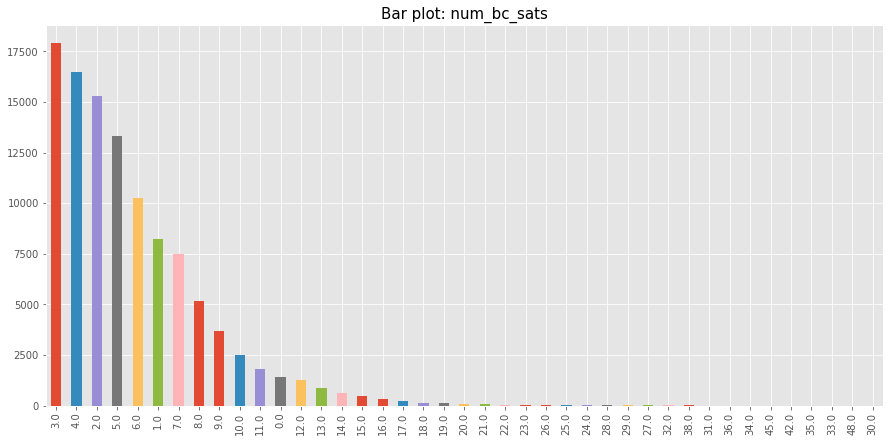

In [115]:
fig = plt.figure(figsize=(15,7))
loan.num_bc_sats.value_counts().plot(kind = 'bar')
plt.title('Bar plot: num_bc_sats',fontsize=15)

### 2.4.17 num_bc_tl
- Description: Number of bankcard accounts.
- Summary: Many outliers under num_actv_bc_tl. Most loan applicants have 3 to 7 bankcard accounts.

Text(0.5,1,'Box plot: num_bc_tl')

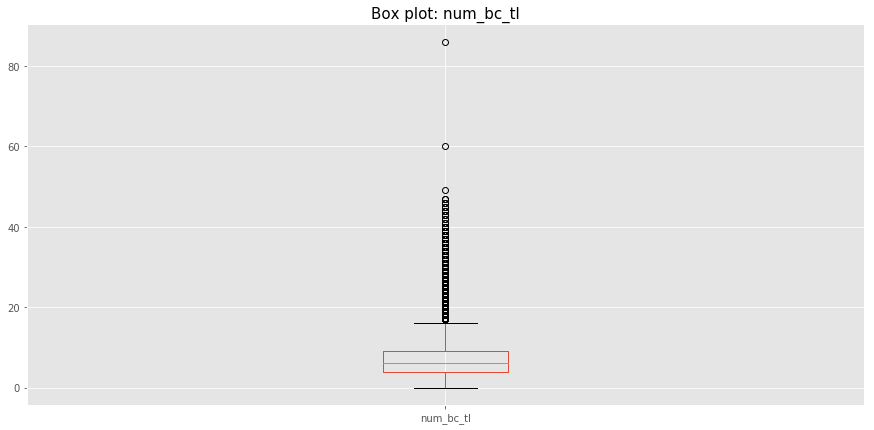

In [116]:
fig = plt.figure(figsize=(15,7))
loan.num_bc_tl.plot(kind = 'box')
plt.title('Box plot: num_bc_tl',fontsize=15)

Text(0.5,1,'Bar plot: num_bc_tl')

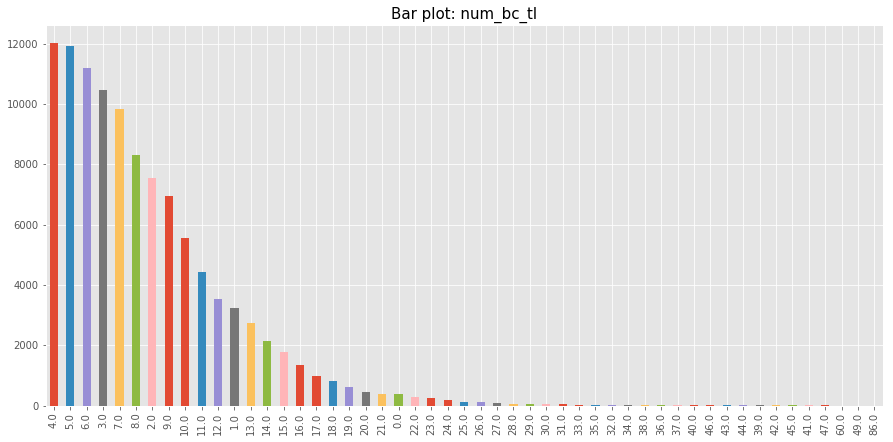

In [117]:
fig = plt.figure(figsize=(15,7))
loan.num_bc_tl.value_counts().plot(kind = 'bar')
plt.title('Bar plot: num_bc_tl',fontsize=15)

### 2.4.18 num_sats
- Description: Number of satisfactory accounts.
- Summary: Many outliers under num_sats.

Text(0.5,1,'Box plot: num_sats')

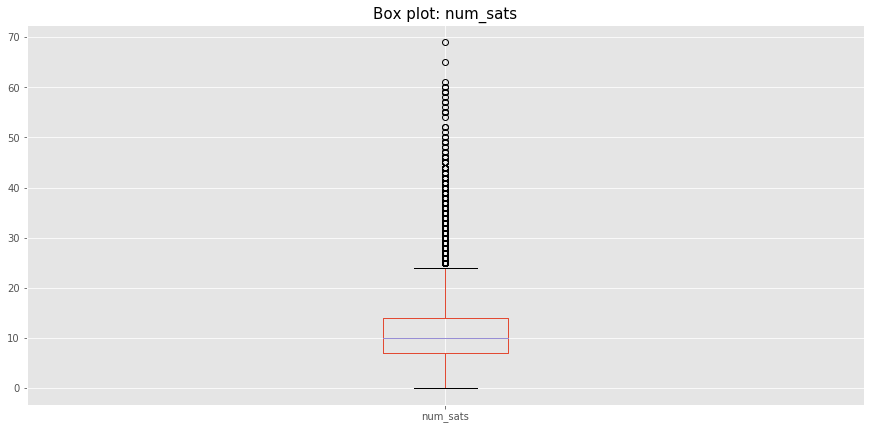

In [118]:
fig = plt.figure(figsize=(15,7))
loan.num_sats.plot(kind = 'box')
plt.title('Box plot: num_sats',fontsize=15)

Text(0.5,1,'Density plot: num_sats')

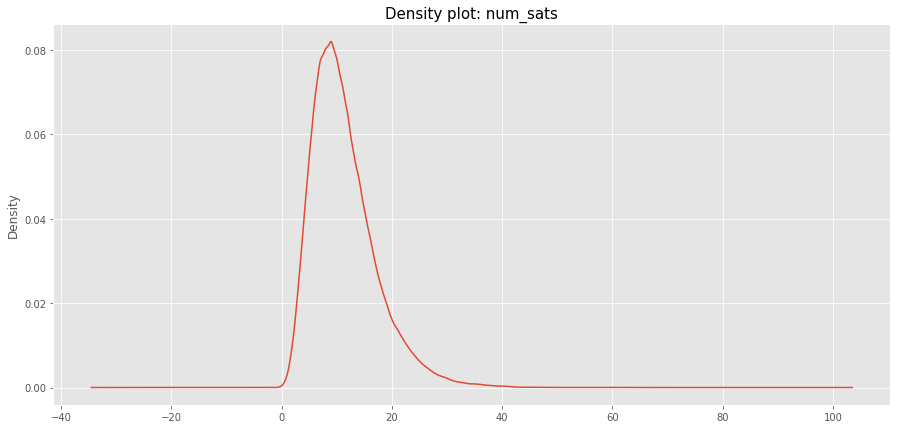

In [119]:
fig = plt.figure(figsize=(15,7))
loan.num_sats.plot(kind = 'density')
plt.title('Density plot: num_sats',fontsize=15)

### 2.4.19 num_tl_120dpd_2m
- Description: Number of accounts currently 120 days past due (updated in past 2 months).
- Summary: Nearly all loan applicatns have 0 account currently 120 days past due.

Text(0.5,1,'Box plot: num_tl_120dpd_2m')

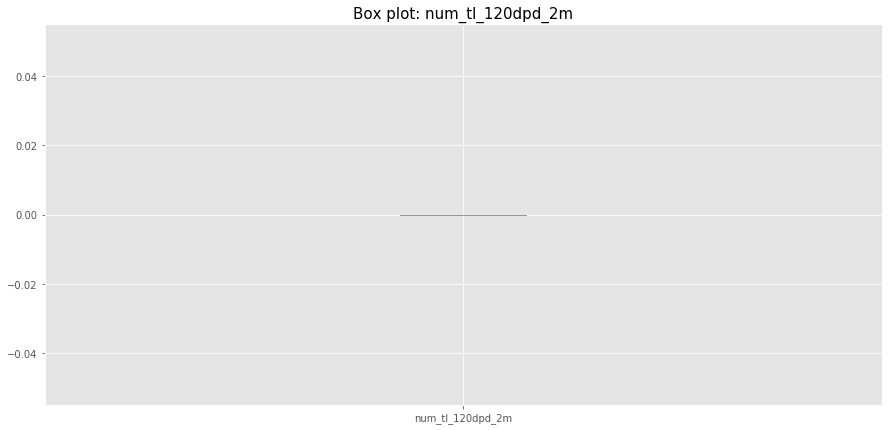

In [120]:
fig = plt.figure(figsize=(15,7))
loan.num_tl_120dpd_2m.plot(kind = 'box')
plt.title('Box plot: num_tl_120dpd_2m',fontsize=15)

In [121]:
round(sum(loan.num_tl_120dpd_2m == 0) / loan.shape[0], 4)

0.9675

### 2.4.20 num_tl_30dpd
- Description: Number of accounts currently 30 days past due (updated in past 2 months).
- Summary: Nearly all loan applicatns have 0 account currently 30 days past due.

Text(0.5,1,'Box plot: num_tl_30dpd')

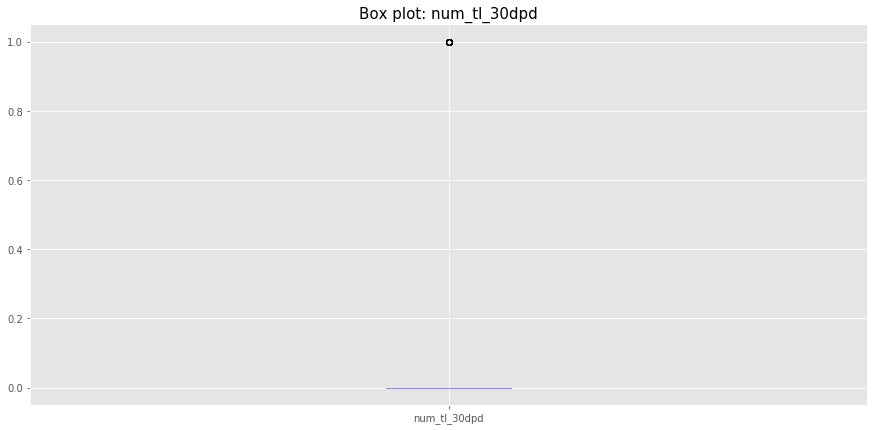

In [122]:
fig = plt.figure(figsize=(15,7))
loan.num_tl_30dpd.plot(kind = 'box')
plt.title('Box plot: num_tl_30dpd',fontsize=15)

In [123]:
print(round(sum(loan.num_tl_30dpd == 0) / loan.shape[0], 4))
print(sum(loan.num_tl_30dpd != 0))

0.9998
23


### 2.4.21 num_tl_90g_dpd_24m
- Description: Number of accounts 90 or more days past due in last 24 months.
- Summary: Nearly all loan applicatns have 0 account 90 or more days past due in last 24 months.

Text(0.5,1,'Box plot: num_tl_90g_dpd_24m')

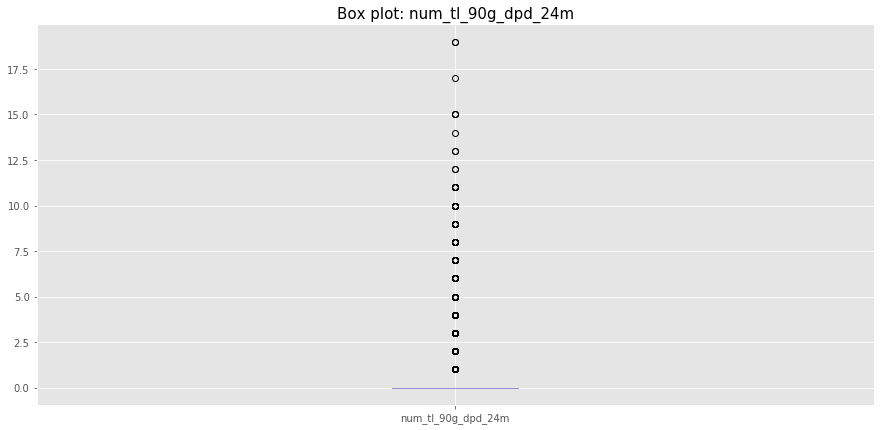

In [124]:
fig = plt.figure(figsize=(15,7))
loan.num_tl_90g_dpd_24m.plot(kind = 'box')
plt.title('Box plot: num_tl_90g_dpd_24m',fontsize=15)

In [125]:
print(round(sum(loan.num_tl_90g_dpd_24m == 0) / loan.shape[0], 4))
print(sum(loan.num_tl_90g_dpd_24m != 0))

0.9607
4241


### 2.4.22 num_tl_op_past_12m
- Description: Number of accounts opened in past 12 months.
- Summary: A fourth of all loan applicants have one account opened in past 12 months.

Text(0.5,1,'Box plot: num_tl_op_past_12m')

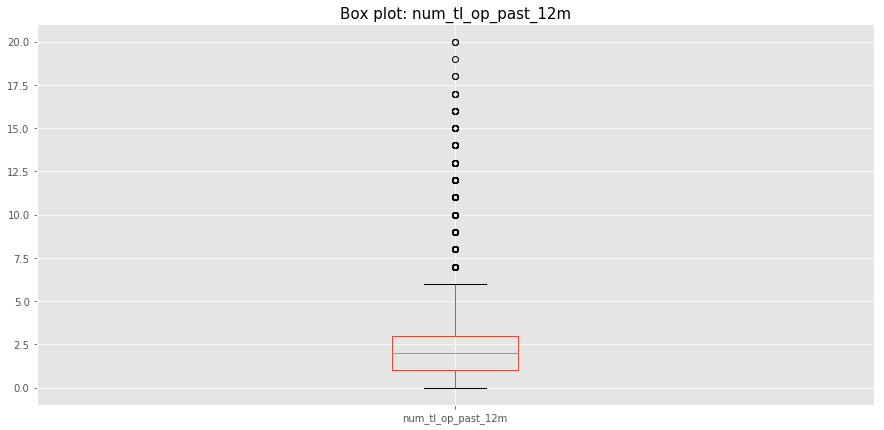

In [126]:
fig = plt.figure(figsize=(15,7))
loan.num_tl_op_past_12m.plot(kind = 'box')
plt.title('Box plot: num_tl_op_past_12m',fontsize=15)

Text(0.5,1,'Bar plot: num_tl_op_past_12m')

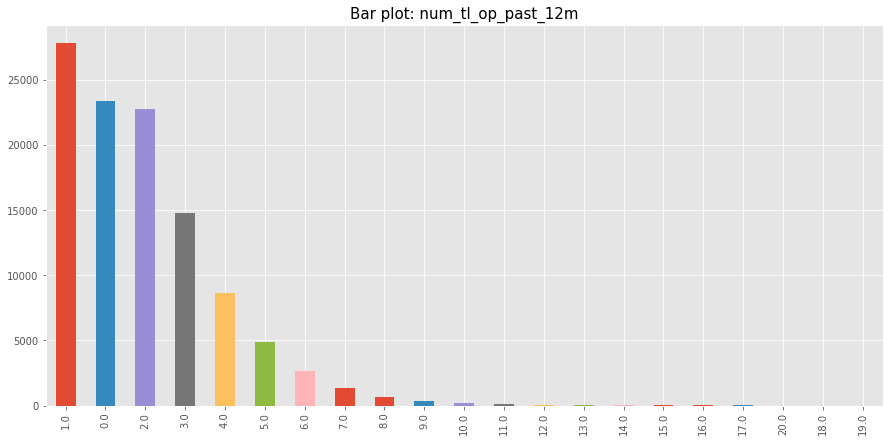

In [127]:
fig = plt.figure(figsize=(15,7))
loan.num_tl_op_past_12m.value_counts().plot(kind = 'bar')
plt.title('Bar plot: num_tl_op_past_12m',fontsize=15)

### 2.4.23 percent_bc_gt_75
- Description: Percentage of all bankcard accounts > 75% of limit.
- Summary: Most loan applicants have 0% of all bankcard accounts > 75% of limit.

Text(0.5,1,'Box plot: percent_bc_gt_75')

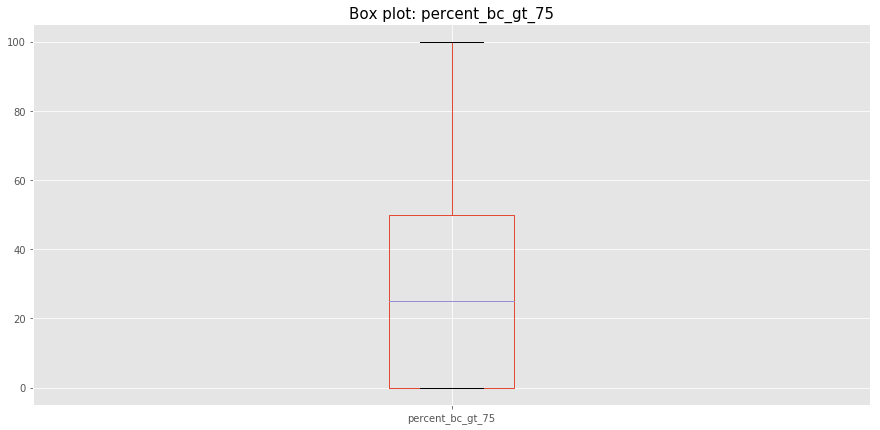

In [128]:
fig = plt.figure(figsize=(15,7))
loan.percent_bc_gt_75.plot(kind = 'box')
plt.title('Box plot: percent_bc_gt_75',fontsize=15)

Text(0.5,1,'Density plot: percent_bc_gt_75')

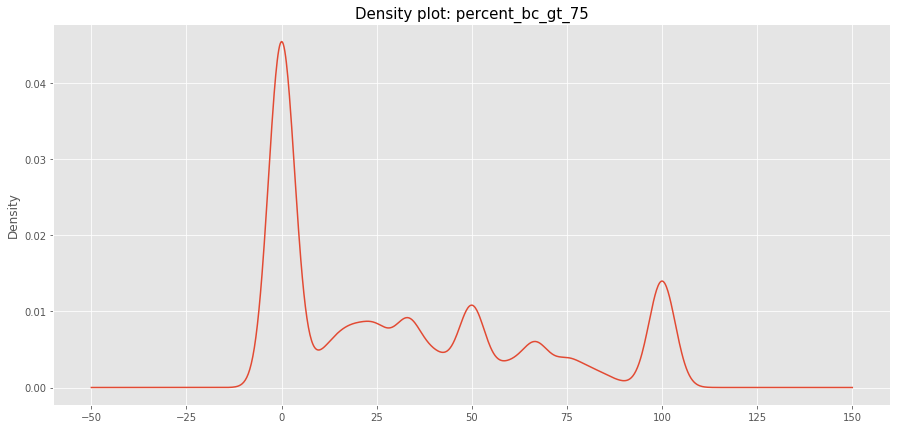

In [129]:
fig = plt.figure(figsize=(15,7))
loan.percent_bc_gt_75.plot(kind = 'density')
plt.title('Density plot: percent_bc_gt_75',fontsize=15)

### 2.4.24 tax_liens
- Description: Number of tax liens.
- Summary: Most loan applicants have 0 tax lien.

Text(0.5,1,'Box plot: tax_liens')

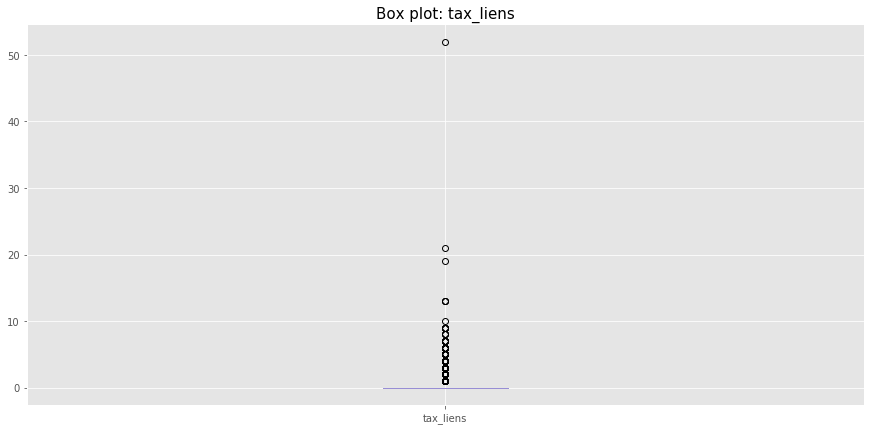

In [130]:
fig = plt.figure(figsize=(15,7))
loan.tax_liens.plot(kind = 'box')
plt.title('Box plot: tax_liens',fontsize=15)

In [131]:
round(sum(loan.tax_liens == 0) / loan.shape[0], 4)

0.9758

### 2.4.25 tot_hi_cred_lim
- Description: Total high credit/credit limit.
- Summary: Many outliers and a very skewed distribution under tot_hi_cred_lim.

Text(0.5,1,'Box plot: tot_hi_cred_lim')

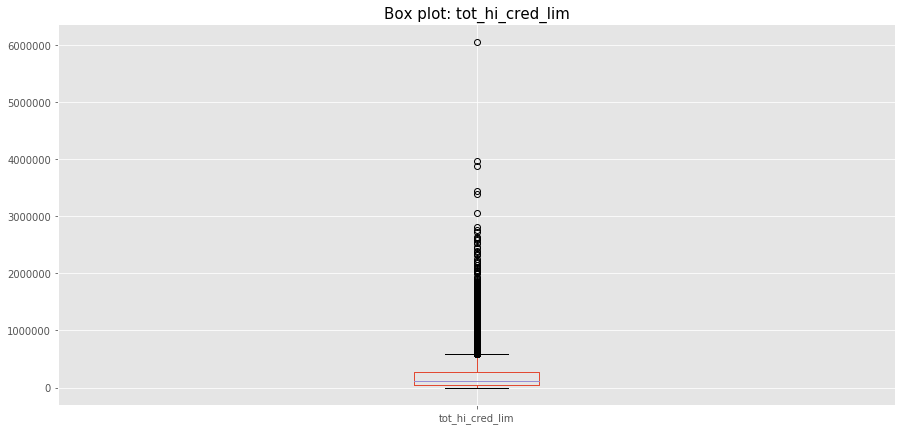

In [132]:
fig = plt.figure(figsize=(15,7))
loan.tot_hi_cred_lim.plot(kind = 'box')
plt.title('Box plot: tot_hi_cred_lim',fontsize=15)

Text(0.5,1,'Density plot: tot_hi_cred_lim')

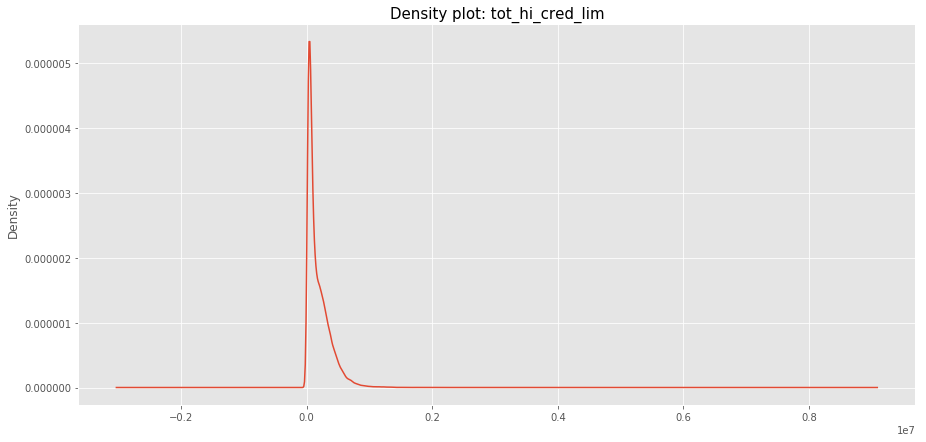

In [133]:
fig = plt.figure(figsize=(15,7))
loan.tot_hi_cred_lim.plot(kind = 'density')
plt.title('Density plot: tot_hi_cred_lim',fontsize=15)

### 2.4.26 total_bal_ex_mort
- Description: Total credit balance excluding mortgage.
- Summary: Many outliers and a very skewed distribution under total_bal_ex_mort.

Text(0.5,1,'Box plot: total_bal_ex_mort')

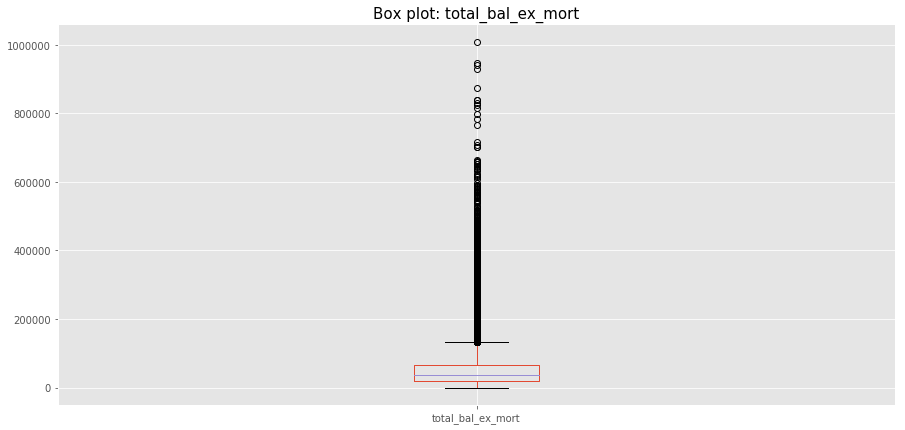

In [134]:
fig = plt.figure(figsize=(15,7))
loan.total_bal_ex_mort.plot(kind = 'box')
plt.title('Box plot: total_bal_ex_mort',fontsize=15)

Text(0.5,1,'Density plot: total_bal_ex_mort')

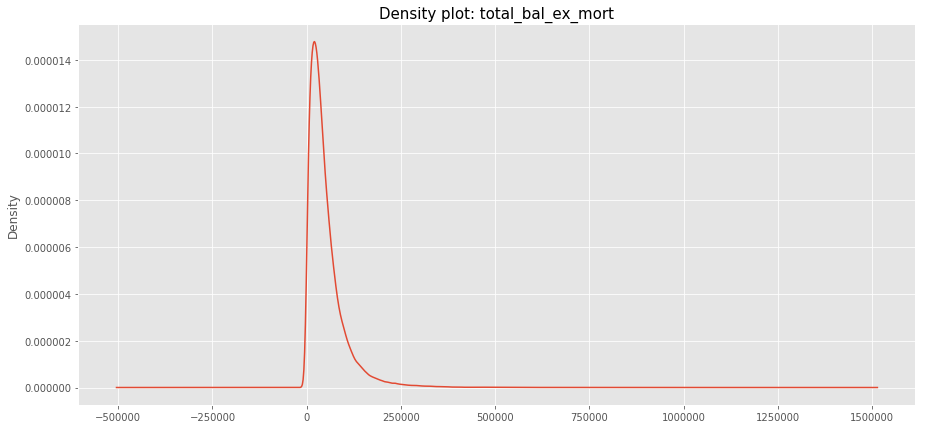

In [135]:
fig = plt.figure(figsize=(15,7))
loan.total_bal_ex_mort.plot(kind = 'density')
plt.title('Density plot: total_bal_ex_mort',fontsize=15)

### 2.4.27 total_bc_limit
- Description: Total bankcard high credit/credit limit.
- Summary: Many outliers and a very skewed distribution under total_bc_limit.

Text(0.5,1,'Box plot: total_bc_limit')

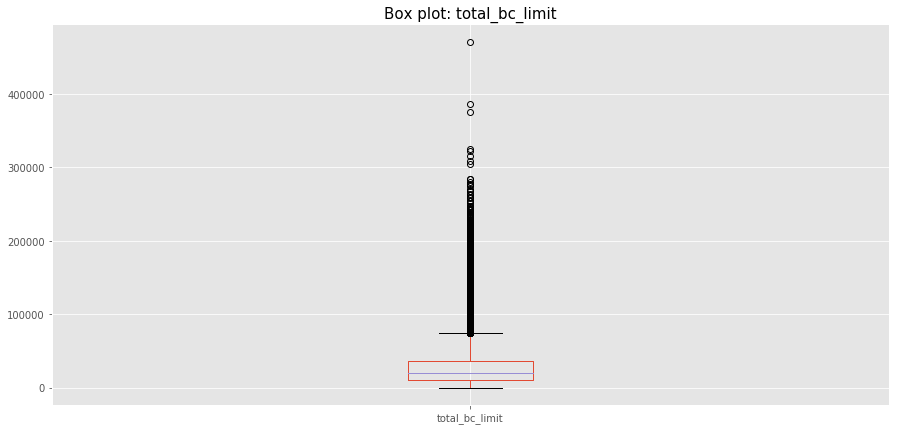

In [136]:
fig = plt.figure(figsize=(15,7))
loan.total_bc_limit.plot(kind = 'box')
plt.title('Box plot: total_bc_limit',fontsize=15)

Text(0.5,1,'Density plot: total_bc_limit')

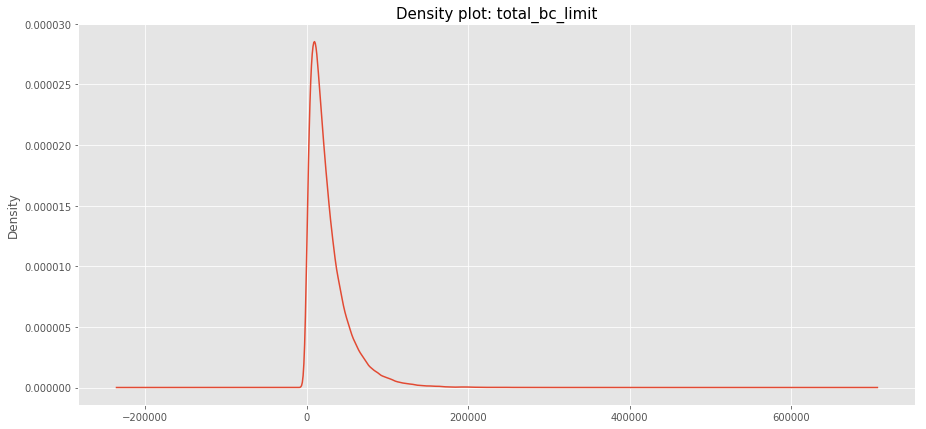

In [137]:
fig = plt.figure(figsize=(15,7))
loan.total_bc_limit.plot(kind = 'density')
plt.title('Density plot: total_bc_limit',fontsize=15)

## In total, 145 features in this dataset
- Demonstrate more meaningful visualizations in next ipynb file (Feature Preprocessing & Selection).